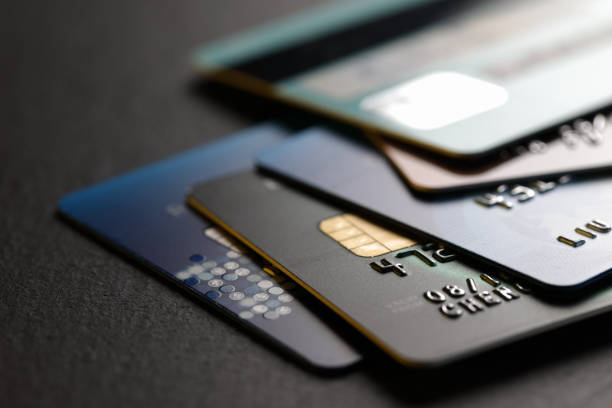
<h1 align="center"> Tarea 2 - Joaquín Arhancet, Daniel Belderrain y Santiago Nalerio

### <font color='steelblue'><h1 align="center"><ins>Clustering de Clientes</ins>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import plotly as py
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('DatasetTrxs.csv')

# Tabla de contenidos
 - [Data Exploration](#lower)
 - [Data Cleaning](#remove)
 - [K-Means](#stemming)
 - [DBSCAN](#stop)
 - [Método de Ward](#a)
 - [Listado de Preguntas y Modelo Predictivo](#b)
 - [Comentarios Finales](#lemmatisation)

# <font color='steelblue'> 1. Data Exploration:  <a id='lower'></a>

In [3]:
df.head(3)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12

In [4]:
df.describe(include='all')

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C15807           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           8950.000000                 8950.000000   
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        8950.000000             8950.000000   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        8950.000000    8950.000000   8949.000000   8950.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENUR

In [5]:
df.shape

(8950, 18)

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe(include='all')

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C15807           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           8950.000000                 8950.000000   
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        8950.000000             8950.000000   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        8950.000000    8950.000000   8949.000000   8950.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENUR

# Descripción de las variables

- **CustID**: Identificador del cliente
- **Balance**: Monto del saldo disponible para realzar compras
- **Balance Frequency**: Frecuencia de actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia) 
- **Purchases**: Importe de las compras realizadas
- **One Off Purchases**: Monto máximo de una compra realizada de una sola vez
- **Installments Purchases**: Cantidad de compras hechas en cuotas
- **Cash Advance**: Cantidad de retiros en efectivo
- **Purchases Frequency**: Frecuencia de las compras (1 = frecuentemente, 0 = no frecuentemente)
- **One Off Purchases Frequency**: Compras frecuentes son realizadas de una sola vez (1= frecuentemente, 0= no frecuentemente)
- **Purchases Installments Frequency**: Frecuencia de compras en cuotas (1=frecuentemente, 0=no frecuentemente)
- **Cash Advance Frequency**: Frecuencia de retiros en efectivo (1=frecuentemente, 0=no frecuentemente)
- **Cash Advance Trx**: Cantidad de transacciones de retiro en efectivo
- **Purchases Trx**: Cantidad de transacciones
- **Credit Limit**: Límite de crédito
- **Payments**: Cantidad de pagos efectuados por el usuario
- **Minimum Payments**: Cantidad de pagos mínimos hechos por el usuario
- **PRC Full Payment**: Porcentaje de pagos totales hechos por el usuario
- **Tenure**: Tenencia de la tarjeta de crédito (meses)

In [9]:
nombre_columnas = df.columns
df.columns = [x.lower() for x in nombre_columnas]

In [10]:
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [11]:
df.describe(include='all')

cust_id       balance  balance_frequency     purchases  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C15807           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        oneoff_purchases  installments_purchases  cash_advance  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        purchases_frequency  oneoff_purchases_frequency  \
count           8950.000000                 8950.000000   
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        purchases_installments_frequency  cash_advance_frequency  \
count                        8950.000000             8950.000000   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        cash_advance_trx  purchases_trx  credit_limit      payments  \
count        8950.000000    8950.000000   8949.000000   8950.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        minimum_payments  prc_full_payment       tenur

## Balance

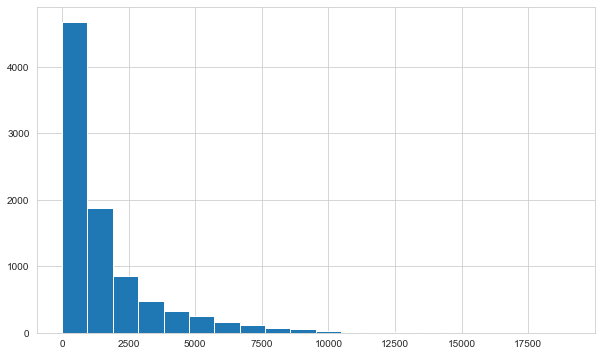

In [12]:
df['balance'].hist(bins=20,figsize=(10,6))
display()

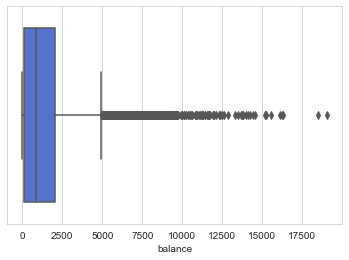

In [13]:
sns.boxplot(x = df['balance'], color = 'royalblue')
display()

In [14]:
# Para Balance, se presenta una distribución unimodal y con una fuerte asimetría positiva.
# Ambas gráficas nos permiten ver como la mayoría de los clientes tope de crédito no muy alto.
# No identificamos data quality issues.

## Balance Frequency

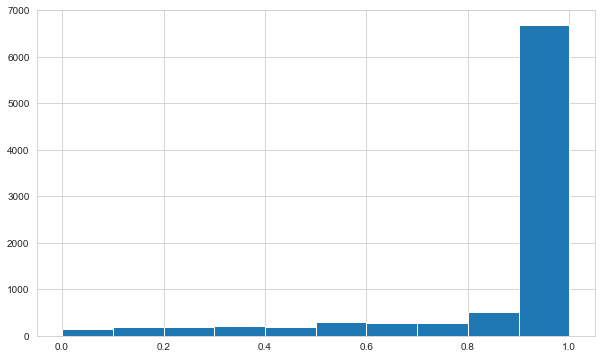

In [15]:
df['balance_frequency'].hist(figsize=(10,6))
display()

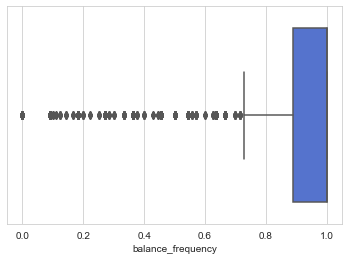

In [16]:
sns.boxplot(x = df['balance_frequency'], color = 'royalblue')
display()

In [17]:
# La distribución de Balance Frequency es unimodal con una fuerte asimetría negativa
# Ambas gráficas nos permiten ver como la mayoría de la actualización del saldo es frecuente
# No identificamos data quality issues.

## Purchases

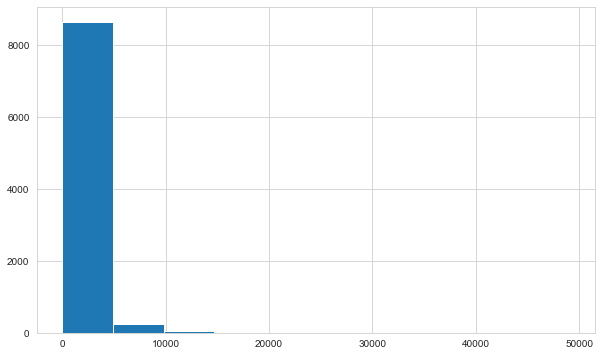

In [18]:
df['purchases'].hist(figsize=(10,6))
display()

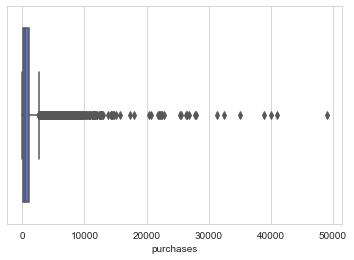

In [19]:
sns.boxplot(x = df['purchases'], color = 'royalblue')
display()

In [20]:
# La distribución de Purchases es unimodal con una fuerte asimetría positiva.
# Ambas gráficas nos permiten ver como la mayoría de los importes de las compras relizadas son bajas.
# No identificamos data quality issues.

## One Off Purchases

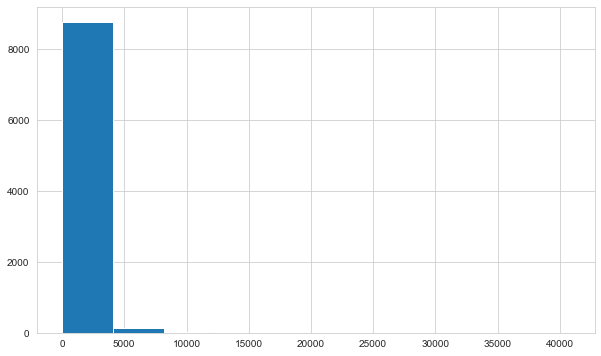

In [21]:
df['oneoff_purchases'].hist(figsize=(10,6))
display()

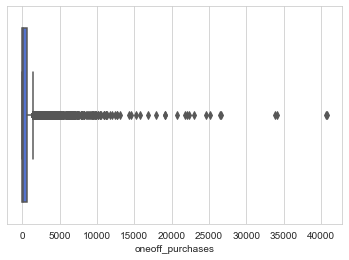

In [22]:
sns.boxplot(x = df['oneoff_purchases'], color = 'royalblue')
display()

In [23]:
# La distribución de One Off Purchases es unimodal con una fuerte asimetría positiva
# No identificamos data quality issues.

## Installments Purchases

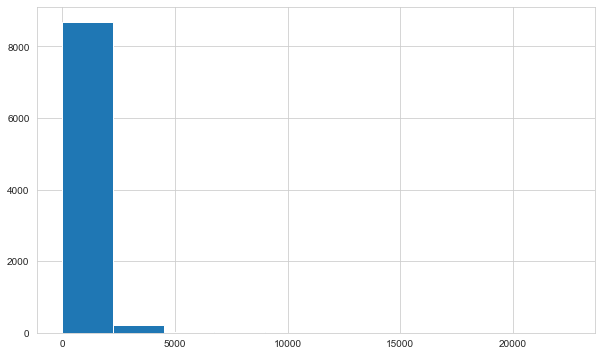

In [24]:
df['installments_purchases'].hist(figsize=(10,6))
display()

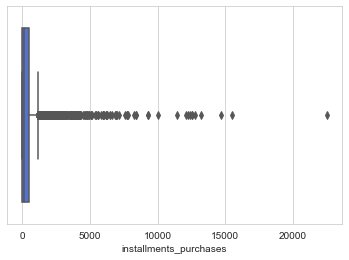

In [25]:
sns.boxplot(x = df['installments_purchases'], color = 'royalblue')
display()

In [26]:
# La distribución de Installments Purchases unimodal con una fuerte asimetría positiva
# Ambas gráficas nos permiten ver como la mayoría de las compras realizadas en cuotasson bajas aunque se ven algunos outliers 
# No identificamos data quality issues.

## Cash Advance

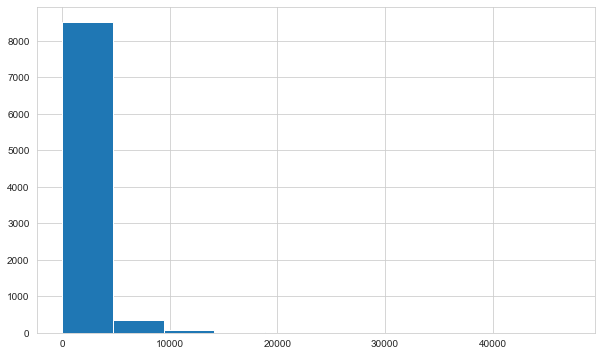

In [27]:
df['cash_advance'].hist(figsize=(10,6))
display()

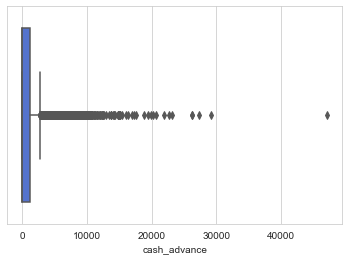

In [28]:
sns.boxplot(x = df['cash_advance'], color = 'royalblue')
display()

In [29]:
# La distribución de Cash Advance es unimodal con una fuerte asimetría positiva
# No identificamos data quality issues.

## Purhcases Frequency

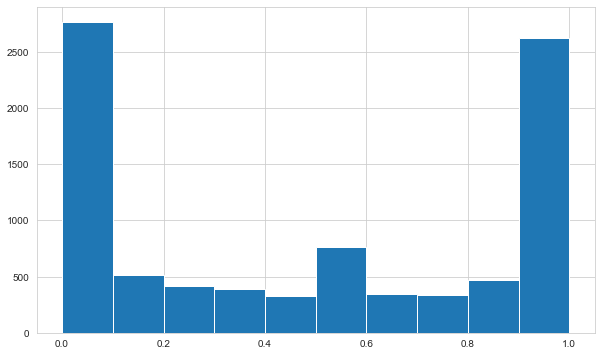

In [30]:
df['purchases_frequency'].hist(figsize=(10,6))
display()

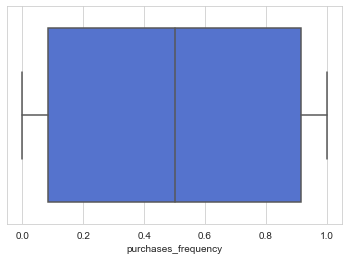

In [31]:
sns.boxplot(x = df['purchases_frequency'], color = 'royalblue')
display()

In [32]:
# La distribución de Purchases frecuency es bimodal.

# Ambas gráficas nos permiten ver como la población se divide en polos opuestos: los que compran frecuentemente y los que 
# no. Hay una minoría que se distribuye entre estos dos polos 

# No identificamos data quality issues.

## One Off Purchases Frequency

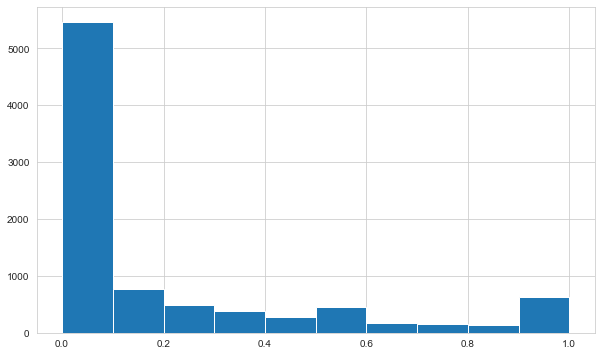

In [33]:
df['oneoff_purchases_frequency'].hist(figsize=(10,6))
display()

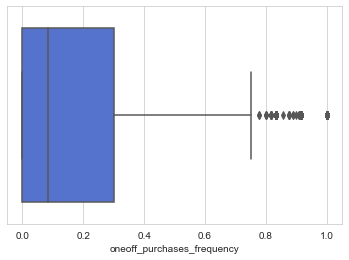

In [34]:
sns.boxplot(x = df['oneoff_purchases_frequency'], color = 'royalblue')
display()

In [35]:
# La distribución de One off Purchaseses unimodal con una fuerte asimetría positiva
# No identificamos data quality issues.

## Purchases Installments Frequency

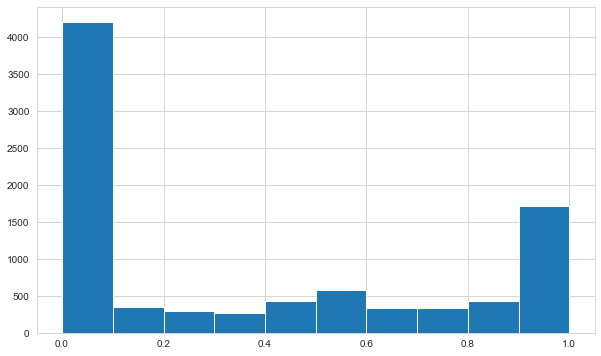

In [36]:
df['purchases_installments_frequency'].hist(figsize=(10,6))
display()

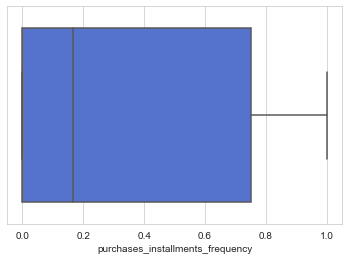

In [37]:
sns.boxplot(x = df['purchases_installments_frequency'], color = 'royalblue')
display()

In [38]:
# La distribución de Purchases Installments Frecuency es unimodal con una fuerte asimetría positiva
# Ambas gráficas nos permiten ver como la mayoría de las compras realizadas en cuotas
# No identificamos data quality issues.

## Cash Advance Frequency

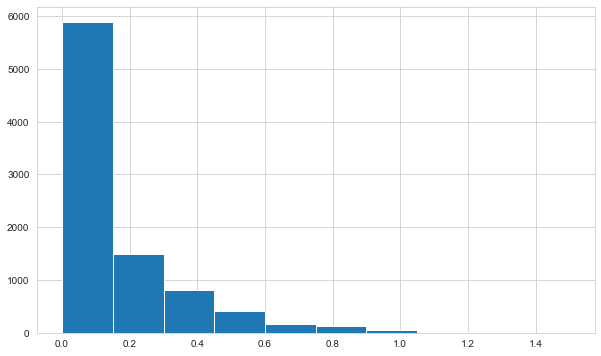

In [39]:
df['cash_advance_frequency'].hist(figsize=(10,6))
display()

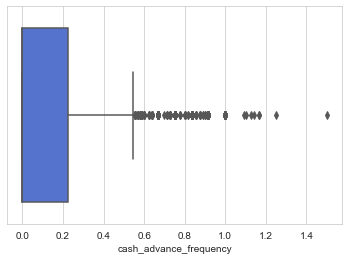

In [40]:
sns.boxplot(x = df['cash_advance_frequency'], color = 'royalblue')
display()

In [41]:
# La distribución de Cash Advance Frecuency es unimodal con una fuerte asimetría positiva.
# Ambas gráficas nos permiten ver como la frecuencia de retiros en efectivo es baja.
# Identificamos data quality issues en aquellos valores que superan el 1. Serán tratados luego.

## Cash Advance TRX

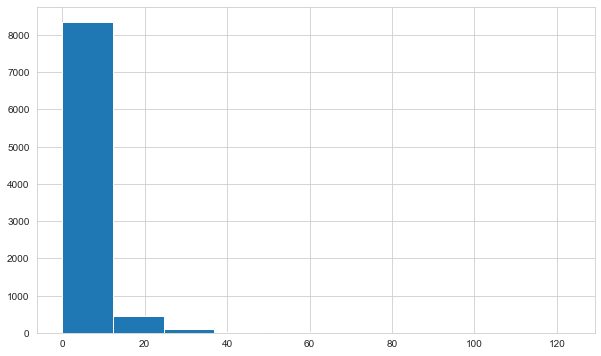

In [42]:
df['cash_advance_trx'].hist(figsize=(10,6))
display()

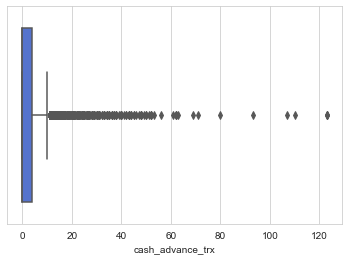

In [43]:
sns.boxplot(x = df['cash_advance_trx'], color = 'royalblue')
display()

In [44]:
# La distribución de Cash Advance TRX es unimodal con una fuerte asimetría positiva
# No identificamos data quality issues.

## Purchases TRX

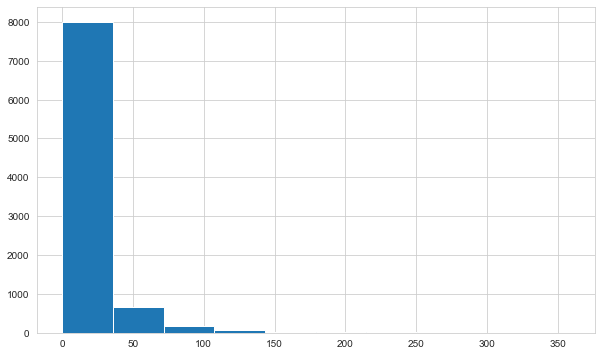

In [45]:
df['purchases_trx'].hist(figsize=(10,6))
display()

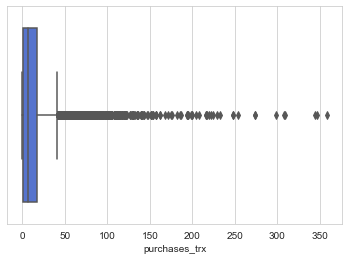

In [46]:
sns.boxplot(x = df['purchases_trx'], color = 'royalblue')
display()

In [47]:
# La distribución de Purchase TRX es unimodal con una fuerte asimetría positiva
# No identificamos data quality issues.

## Credit Limit

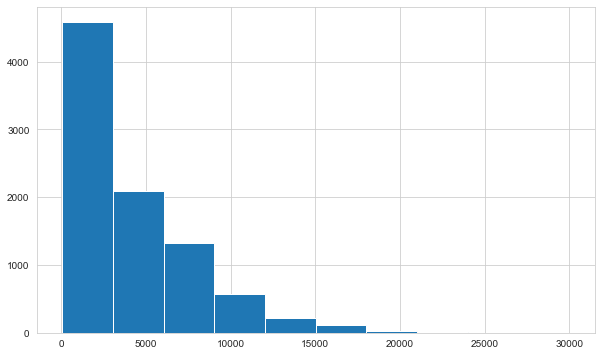

In [48]:
df['credit_limit'].hist(figsize=(10,6))
display()

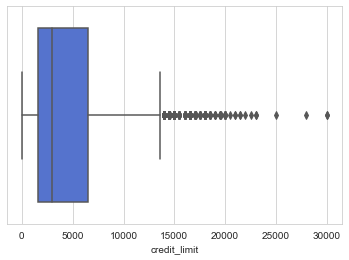

In [49]:
sns.boxplot(x = df['credit_limit'], color = 'royalblue')
display()

In [50]:
# La distribución de Credit Limit es unimodal con una fuerte asimetría positiva
# Ambas gráficas nos permiten ver como la mayoría de los límites de crédito son de un monto bajo aunque se ven  outliers 
# No identificamos data quality issues.

## Payments

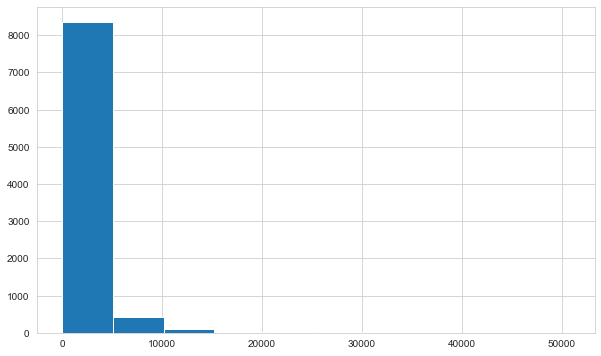

In [51]:
df['payments'].hist(figsize=(10,6))
display()

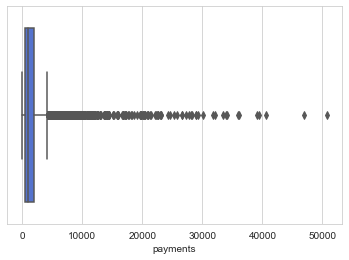

In [52]:
sns.boxplot(x = df['payments'], color = 'royalblue')
display()

In [53]:
# La distribución de Payments es unimodal con una fuerte asimetría positiva
# Ambas gráficas nos permiten ver como la mayoría de los pagos realizados son de un monto bajo aunque se ven  outliers 
# No identificamos data quality issues.

## Minimum Payments

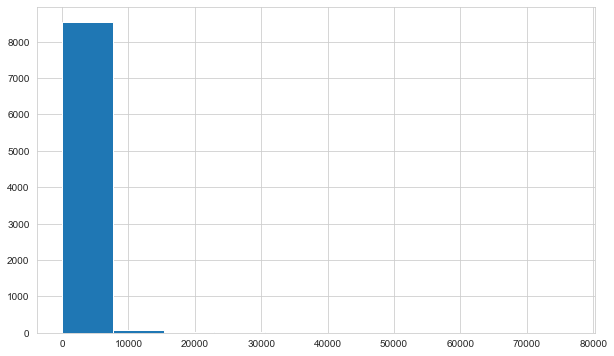

In [54]:
df['minimum_payments'].hist(figsize=(10,6))
display()

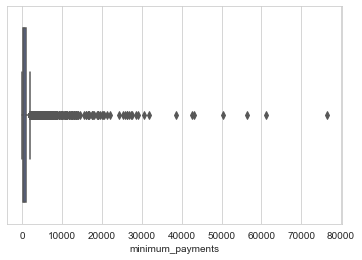

In [55]:
sns.boxplot(x = df['minimum_payments'], color = 'royalblue')
display()

In [56]:
# La distribución de Minimum payments es unimodal con una fuerte asimetría positiva
# Ambas gráficas nos permiten ver como la mayoría de los pagos minimos realizados son de un monto bajo aunque se ven outliers 
# No identificamos data quality issues.

## PRC Full Payment

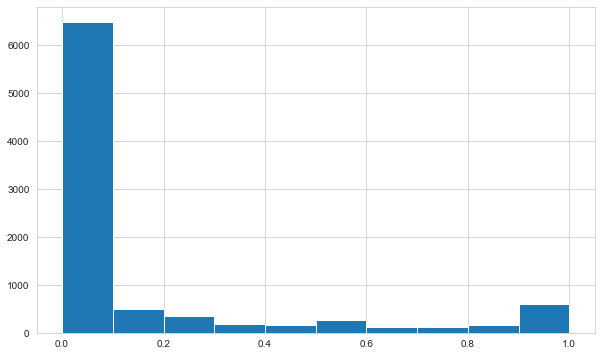

In [57]:
df['prc_full_payment'].hist(figsize=(10,6))
display()

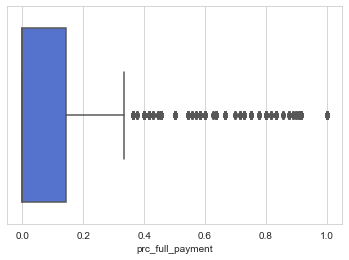

In [58]:
sns.boxplot(x = df['prc_full_payment'], color = 'royalblue')
display()

In [59]:
# La distribución de PRCFullPayments es unimodal con una fuerte asimetría positiva
# Ambas gráficas nos permiten ver como la mayoría de los porcentajes son bajos 
# No identificamos data quality issues.

## Tenure

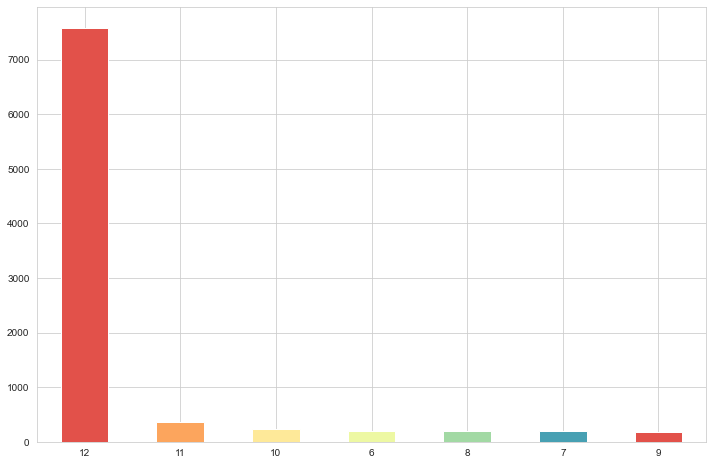

In [60]:
palette = sns.color_palette("Spectral")

df['tenure'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)
display()

In [61]:
# La gran mayoría de las presonas tienen la tarjeta hace 12 meses.
# Los que lo siguen en menor proporción son 11 y 10 meses.
# No hay nadie que tenga la tarjeta hace menos de 9 meses.

In [62]:
balance = df.groupby(['tenure']).mean()[["balance"]]
purchases = df.groupby(['tenure']).mean()[["purchases"]]
payments = df.groupby(['tenure']).mean()[["payments"]]

a = balance.join(purchases)
b = a.join(payments)

b.reset_index()

tenure      balance    purchases     payments
0       6  1095.890702   443.941667   636.886258
1       7  1003.800362   424.559421   793.778037
2       8  1127.963470   468.858929   842.787393
3       9  1098.752149   540.138171   967.757363
4      10  1251.955773   676.631271  1127.220569
5      11  1641.770893   571.222411  1568.695623
6      12  1619.158166  1088.192402  1853.606676

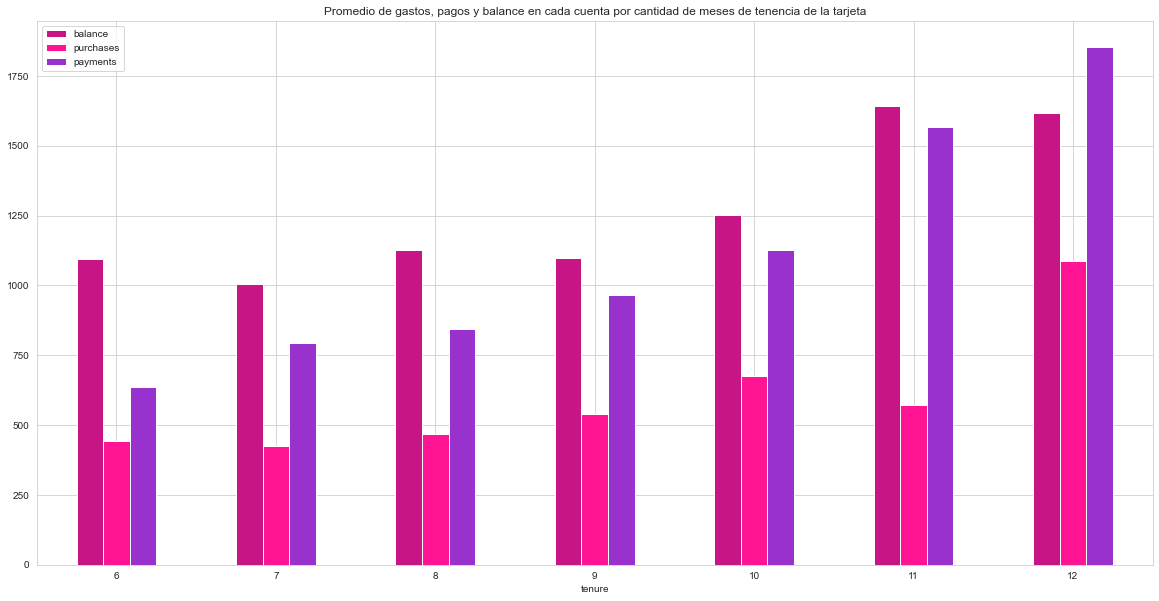

In [63]:
b.plot(kind = 'bar', figsize = (20, 10),color=['mediumvioletred','deeppink', 'darkorchid'],title='Promedio de gastos, pagos y balance en cada cuenta por cantidad de meses de tenencia de la tarjeta')
plt.xticks(rotation=0)
display()

- Gracias a la función groupby, y la gráfica, podemos observar como a medida que pasa el tiempo, los clientes más fieles al banco, tienen cierta tendencia a aumentar sus gastos con su tarjeta de crédito, pero también aumenta el promedio del monto de pagos como el balance. Ésto último puede indicar cierto compromiso del cliente a pagar sus deuda en tiempo y forma.
- A primera vista, podemos llegar a pensar que los clientes que hace más tiempo están en el banco, son posiblemente los más valiosos, es decir, aquellos a los que se quiere apuntar como público de la tarjeta platinum.

## Correlaciones entre Variables

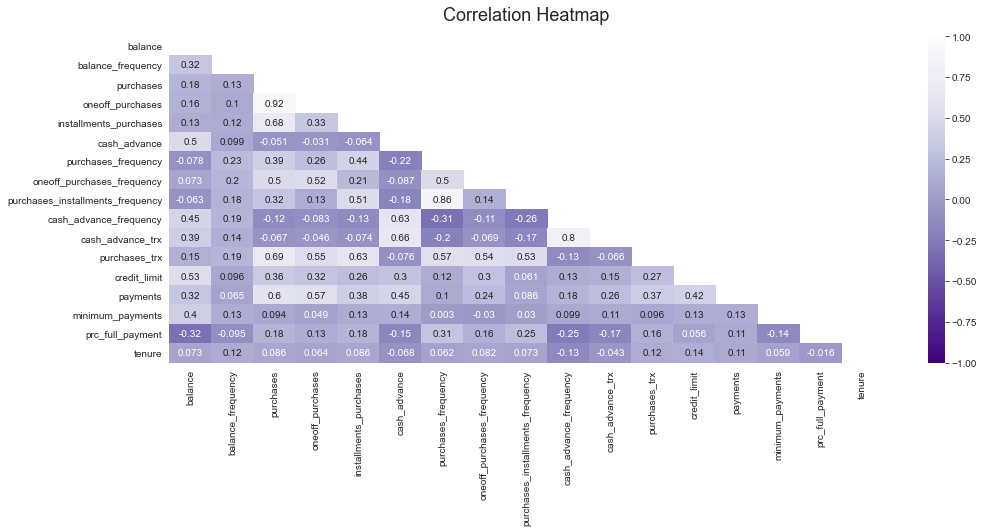

In [64]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Purples_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
display()

En la matriz de correlacion podemos hacer un analisis mas especifico y exhaustivo sobre nuestro DataFrame. 

**Correlación Positiva Fuerte:**
- oneoff_purchases - purchases (0.92)
- purchases_installments_frequency - purchases_frecuency (0.86)
- cash_advance_trx - cash_advance_frecuency (0.80)
 
En lo que respecta a la relación entre las variables oneoff_purchases y purchases podemos concluir que el 0.92 de correlación existente se debe a que ambas variables reflejan montos de compra. Entendemos que la variable oneoff_purchases forma parte de la variable purchase. Es decir, el monto máximo de una compra puntual aumenta el importe total de las compras realizadas por el cliente.

Sobre la relación existente entre las variables purchases_installments_frequency y purchases_frecuency podemos concluir que el 0.86 de correlación existente se debe a que ambas variables reflejan frecuencia de compras,una indica la frecuencia de compras en cuotas y la otra la frecuencia total de compras. Entendemos que la variable purchases_installments_frequency forma parte de la variable purchases_frecuency. Es decir, el realizar una compra en cuotas aumenta la frecuencia de compras en general.

Por último, sobre la relación entre las variables cash_advance_trx - cash_advance_frecuency podemos concluir que el 0.80 de correlación existente se debe a que ambas variables reflejan retiros de efectivo,una que tan frecuente el cliente retira efectivo de su cuenta y la otra la frecuencia de retiros en efectivo. Entendemos que la variable cash_advance_trx influye en la variable cash_advance_frecuency. Es decir, al realizar muchos retiros en efectivo en un cierto período de tiempo aumenta la frecuencia de retiros en general.

 
 
**Correlación Negativa Fuerte:**
- prc_full_payment - balance (-0.32)
- cash_advance_frecuency - purchases_frecuency (-0.31)
- cash_advance_frecuency - purchases_installments_frequency (-0.26)
     
La relación negativa entre prc_full_payment - balance de -0.32 se explica en el hecho de que la primera mencionada afecta de manera negativa a la otra. El prc_full_payment habla del porcentaje de pagos totales realizados por el cliente, entonces, si este porcentaje crece, el balance de la cuenta baja porque el cliente está afrontando todos los pagos correspondientes a su tarjeta de crédito. Dicho esto, es lógico concluir que al aumentar una, baja la otra.

En lo que concierne a la relación negativa entre cash_advance_frecuency y purchases_frecuency, podemos pensar que este valor de correlación de -0.31 habla de que al aumentar la frecuencia de retiros en efectivo de cada cliente, baja la frecuencia de compras, lo cual es raro. Podríamos decir que los clientes que más dinero retiran, son menos propensos a realizar compras o pagos con su tarjeta, tal vez ellos habitúan a manejar efectivo antes que su tarjeta de crédito.

La última relación a analizar es la de cash_advance_frecuency y purchases_installments_frequency. Esta correlación de -0.26 si puede ser interpretada fácilmente. La primera variable habla de la frecuencia de retiros en efectivo, mientras que la otra habla de la frecuencia de compras en cuotas. Entonces este -0.26 nos hace entender que si una persona frecuenta a retirar efectivo de su banco, es más propensa a no hacer compras con su tarjeta. Posiblemente estemos hablando en estos casos de personas que manejan mucho más el dinero en efectivo que mediante su tarjeta de crédito del banco.

Todas estas cuestiones y muchas otras van a ser analizadas y utilizadas para poder generar mayor valor al trabajo y mejorar nuestros modelos y la clusterización.

# <font color='steelblue'> 2. Data Cleaning:  <a id='remove'></a>

## Missing Values

In [65]:
df.loc[(df['minimum_payments'].isnull()==True),'minimum_payments']=df['minimum_payments'].median()
df.loc[(df['credit_limit'].isnull()==True),'credit_limit']=df['credit_limit'].median()

A los datos faltantes, decidimos reemplazarlos con el valor de sus respectivas medianas.
Consideramos que para este caso imputar la mediana es más acertado que hacerlo con la media, ya que ésta última tiene cierta tendencia a verse afectada por posibles outliers.

## Chequeo de Outliers

Usando IQR, podemos seguir el siguiente enfoque para encontrar valores atípicos:

- Calculamos el primer y tercer cuartil (Q1 y Q3).
- Evaluamos el rango intercuartílico, IQR = Q3-Q1.
- Estimamos el límite inferior. LI = Q1 + 1.5 * IQR
- Estimamos el límite superior. LS = Q3 + 1.5 * IQR
- Los puntos de datos que se encuentran fuera del límite inferior y superior son valores atípicos.

In [66]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [67]:
df = df.drop(['cust_id'], axis=1)
for column in df.columns:
    data = df[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers en "{column}": {percent}%')

Outliers en "balance": 7.77%
Outliers en "balance_frequency": 16.68%
Outliers en "purchases": 9.03%
Outliers en "oneoff_purchases": 11.32%
Outliers en "installments_purchases": 9.69%
Outliers en "cash_advance": 11.51%
Outliers en "purchases_frequency": 0.0%
Outliers en "oneoff_purchases_frequency": 8.74%
Outliers en "purchases_installments_frequency": 0.0%
Outliers en "cash_advance_frequency": 5.87%
Outliers en "cash_advance_trx": 8.98%
Outliers en "purchases_trx": 8.56%
Outliers en "credit_limit": 2.77%
Outliers en "payments": 9.03%
Outliers en "minimum_payments": 10.16%
Outliers en "prc_full_payment": 16.47%
Outliers en "tenure": 15.26%


## Preprocesamiento de los datos

- Identificar valores atípicos
- Tratamiento de outliers
- Escalar los datos
- Reducir dimensiones usando PCA

## ¿Cómo lidiar con outliers?
- **Trimming**: remover los outliers del dataset
- Tratar los outliers como datos faltantes y utilizar algún método de **imputación de valores**.
- **Discretización**: hacer binning y que los outliers entren los bins inferiores o superiores.
- **Censorización**: top/bottom coding. Establecer límites inferiores y superiores en nuestros datos y modificar los outliers para que adopten estos valores.

Para deshacernos del ruido en el dataset, lo primero es establecer a los valores atípicos como NaN. Es de suma importancia aclarar, es que no a todos los outliers que encontremos los vamos a clasificar como erróneos, cosnideramos que en ciertas variables, éstos son correctos, y está bien dejarlos porque reflejan la realidad. 

Consideramos que la opción de tratar a los outliers como datos faltantes, y utilizar algún método de imputación de valores es la mejor de las cuatro para este caso en específico, ya que la opción de eliminar registros no es conveniente, debido al gran porcentaje de información que estaríamos perdiendo, en algunos casos de un porcentaje de alrededor del 17%. Este valor llevado a el total de registros del dataset equivaldría a una pérdida de 1493 filas. Un número sumamente alto para lo que manejamos en este caso.

A continuación, iremos analizando en profundidad variable por variable, determinando el tratamiento a realizar con los outliers en cada caso. En algunos los dejaremos tal cuál están, mientras que otros recibirán el procesamiento necesario para corregir estos errores.

## Variables con Outliers Válidos

- Balance: consideramos a todos los outliers de esta variable como válidos, ya que el balance de una cuenta del banco, representa cuanto dinero tiene una persona en su cuenta, entonces tanto valores sumamente altos como bajos los consideramos válidos. 
- Balance Frequency: esta variable tiene outliers válidos, ya que es posible que una cuenta del banco no tenga cambios en su saldo durante varios días, o por el contrario que los tenga constantemente.
- Purchases: los importes de las compras realizadas van a criterio de cada cliente. Ellos son libres de gastar el monto que quieran si es que así lo desean. Valores altos en este caso, pueden corresponder a la realiad.
- Purchases Frequency: es correcto que los valores vayan entre 0 y 1. Valores altos son totalmente válidos, una persona puede llegar a usar su tarjeta muy frecuentemente.
- One Off Purchases Frequency: viendo los dos gráficos realizados para esta variable, concluimos que los outliers en este caso son válidos.
- Purchases Installments Frequency: hoy en día, la mayoría de las cuotas con tarjetas de crédito son en cuotas lo cual es lógico que esto se vea reflejado en los datos.
- Cash Advance Trx: los valores máximos en esta variable son acordes a la realidad, por lo que nuevamente vamos a tomar estos valores para los análisis próximos.
- Purchases Trx: consideramos que los datos son válidos ya que hablan del uso de la tarjeta del cliente.
- Credit Limit: el límite de crédito es específico de cada cliente, y si el objetivo del trabajo es encontrar clientes para la tarjeta platinum, es lógico encontrar personas con un tope de gasto bastante alto.
- PRC Full Payment: el porcentaje del total de pagos realizados es válido si está entre 0 y 1, y como todos los valores se encuentran en este rango, los damos por buenos.
- Tenure: los meses de posesión de la tarjeta hablan de hechos de la realidad. No es posible que existan datos erróneos en este caso.

## Variables con Outliers Erróneos

- One Off Purchases: esta variable, posee en algunos casos valores demasiado alejados de la media. Para su tratamiento lo que haremos será un top coding. Estableceremos un límite superior a estos outliers. Más precisamente haremos una **clamp transformation**, que le asigna al límite superior el valor de **Q3 + 3*IQR**.

- Installment Purchases: Al igual que en el caso anterior, lo que haremos será un top coding. Le asignaremos un límite superior a los outliers. El valor asignado será de **Q3 + 3*IQR**.

- Cash Advance: De la mano con lo que venimos haciendo, volveremos a haver un top coding. Le vamos a establecer un límite superior a estos outliers. Más precisamente haremos una **clamp transformation**, que le asigna al límite superior el valor de **Q3 + 3*IQR**.

- Cash Advance Frequency: en este caso, a los valores con una frecuencia incorrecta los vamos a convertir al máximo posible que en este caso es 1.

- Payments:Para el tratamiento de outliers lo que haremos será un top coding. Le vamos a asingar un límite superior a estos outliers. Más precisamente haremos una **clamp transformation**, que le asigna al límite superior el valor de **Q3 + 3*IQR**.

- Minimum Payments: En este último caso, no podría faltar nuevamente el top coding, un clásico ya, a esta altura del trabajo. Estableceremos un límite superior a estos outliers. Más precisamente haremos una **clamp transformation**, que le asigna al límite superior el valor de **Q3 + 3*IQR**.

En todos los casos decidimos que la fórmula aplicada para calcular el límite superior sea de Q3 + 3 * IQR en vez de que se multiplique al rango intercuartílico por 1,5 ya que el 3 contempla un poco más a los valores más altos, por lo que se puede "acercar" de cierta manera a la realidad.

## One Off Purchases

In [68]:
iqr = (df['oneoff_purchases'].quantile(0.75)-df['oneoff_purchases'].quantile(0.25))

arreglo1 = df['oneoff_purchases'].quantile(0.75) + 3*iqr
arreglo1

2309.6200000000003

In [69]:
df['oneoff_purchases'] = np.where(df['oneoff_purchases'] >df['oneoff_purchases'].quantile(0.75), arreglo1, df['oneoff_purchases'])

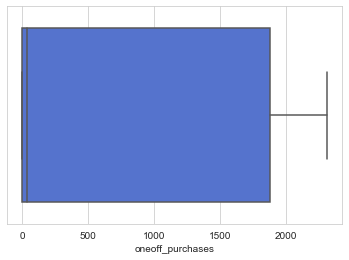

In [70]:
sns.boxplot(x = df['oneoff_purchases'], color = 'royalblue')
display()

## Installment Purchases

In [71]:
iqr = (df['installments_purchases'].quantile(0.75)-df['installments_purchases'].quantile(0.25))

arreglo2 = df['installments_purchases'].quantile(0.75) + 3*iqr
arreglo2

1874.5499999999997

In [72]:
df['installments_purchases'] = np.where(df['installments_purchases'] >df['installments_purchases'].quantile(0.75), arreglo2, df['installments_purchases'])

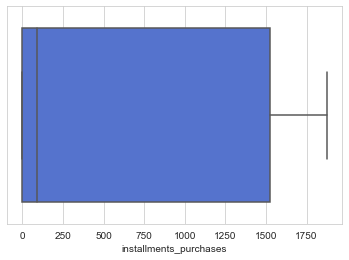

In [73]:
sns.boxplot(x = df['installments_purchases'], color = 'royalblue')
display()

## Cash Advance

In [74]:
iqr = (df['cash_advance'].quantile(0.75)-df['cash_advance'].quantile(0.25))

arreglo3 = df['cash_advance'].quantile(0.75) + 3*iqr
arreglo3

4455.284556999999

In [75]:
df['cash_advance'] = np.where(df['cash_advance'] >df['cash_advance'].quantile(0.75), arreglo3, df['cash_advance'])

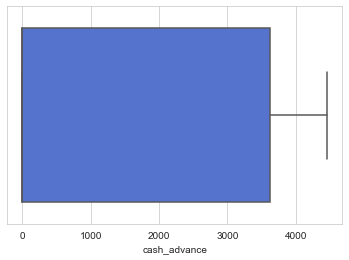

In [76]:
sns.boxplot(x = df['cash_advance'], color = 'royalblue')
display()

## Cash Advance Frequency

In [77]:
def arreglar_cash_advance_frequency(n):
    if n >1:
        return 1
    else:
        if n <= 1:
            return n

df['cash_advance_frequency'] = df['cash_advance_frequency'].apply(arreglar_cash_advance_frequency)

## Payments

In [78]:
iqr = (df['payments'].quantile(0.75)-df['payments'].quantile(0.25))

arreglo4 = df['payments'].quantile(0.75) + 3*iqr
arreglo4

6454.708768999999

In [79]:
df['payments'] = np.where(df['payments'] >df['payments'].quantile(0.75), arreglo4, df['payments'])

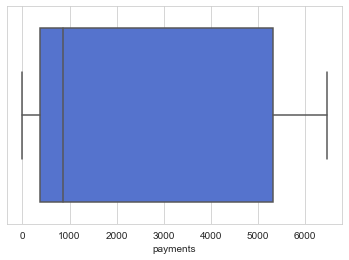

In [80]:
sns.boxplot(x = df['payments'], color = 'royalblue')
display()

## Minimum Payments

In [81]:
iqr = (df['minimum_payments'].quantile(0.75)-df['minimum_payments'].quantile(0.25))

arreglo5 = df['minimum_payments'].quantile(0.75) + 3*iqr
arreglo5

2642.2810402499995

In [82]:
df['minimum_payments'] = np.where(df['minimum_payments'] >df['minimum_payments'].quantile(0.75), arreglo5, df['minimum_payments'])

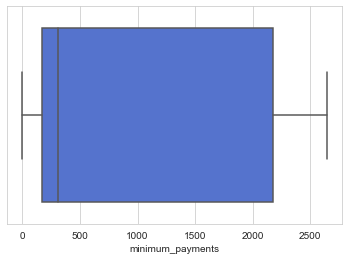

In [83]:
sns.boxplot(x = df['minimum_payments'], color = 'royalblue')
display()

## Standarizamos los datos

In [84]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)

# <font color='steelblue'> 3. K-Means:  <a id='stemming'></a>

**K-Means** es un algoritmo de Aprendizaje No Supervisado, el cual se encuentra enfocado en la clusterización. En el caso de K-Means quiere decir que este algoritmo agrupa nuestros datos en K grupos basandose principalmente en sus caracteristicas y ubicación en el espacio. 

Ahora bien, como realiza el agrupamiento de cada grupo K este algoritmo. Este algoritmo de aprendizaje no supervisado como muchos otros se basa principalmente en las distancias, en este caso en particular se utilizan las distancias cuadraticas. Estas distancias que estamos mencionando son las distancias entre cada punto en el espacio. Cada punto es un registro de datos que tenemos (Una fila) y su ubicacion en el espacio va a estar determinada por sus diferentes valores y caracteristicas, de esta manera obtenemos un espacio en el cual hay muchos puntos y lo que hace el algoritmo K-Means es ir midiendo y comparando las distancias cuadraticas entre los puntos para poder ir creando grupos los cuales tienen puntos que se encuentran basatnte cerca entre ellos (Esto quiere decir que tienen caracteristicas parecidas).

Yendo más en profundidad diremos que el algoritmo utiliza un proceso iterativo, esto quiere decir que el mismo algoritmo va ajustando los grupos hasta encontrar el mejor resultado posible. Para hacer que nuestro algoritmo comience a funcionar hay que pasarle solo 2 cosas básicas, los datos y un número de K (La cantidad de clusters que queremos que el algoritmo cree). Una vez hecho esto, el algoritmo comienza a funcionar.

Lo primero que hace es asignar de manera aleatoria las posiciones de los K centroides (decimos K porque puede ser cualquier número dependiendo del que se ingresó al principio) y luego se itera en dos pasos:

    1. Asignación de Datos: En este paso cada punto (fila como ya explicamos anteriormente) en el espacio se asigna al centroide más cercano basandose en la distancia cuadrada Euclideana.
    2. Actualización de Centroide: En este paso los centroides de cada grupo K son recalculados y reasignados ya que al haber asignado varios puntos a los primeros centroides ahora el algoritmo puede encontrar una ubiacacion más adecuada para los mismos en base a los puntos que fueron asignados en el paso anterior. Esto se hace tomando una media de la distancia de todos los puntos asignados a cada centroide.

Luego de este "pequeño" proceso, el algoritmo vuelve a iterar sobre los datos siguiendo el procedimiento anterior hasta cumplir un cierto criterio en el cual se detniene, este criterio puede darse por diferentes circunstancias como:

    A. Si la suma de las distancias es mínima y por lo tanto ya no hay cambios significativos.
    B. Si se alcanzara un número máximo de iteraciones.
    C. Si no existen cambios en los puntos asignados a los grupos (clusters).

Habiendose detenido nuestro algoritmo K-Means, podemos decir que llegó a converger en un resultado denominado como óptimo local, esto quiere decir que no necesariamente puede ser un resultado que sea óptimo en términos generales. Es por esta razón que está bueno y es recomendable ejecutar varias veces el algoritmo tomando puntos iniciales aleatorios para asegurarnos de que haya o no haya un mejor resultado final. 

Por último nos gustaría resaltar lo que sería la elección del valor K ya que es literalmente una de las decisiones más importantes que tiene que realizar el equipo al momento de correr este tipo de algoritmos. Si bien en general no existe una manera exacta y efectiva de seleccionar el número de K ya que depende mucho de cada conjunto de datos y de lo que se está buscando, si podemos acercarnos a encontrar o descartar ciertos números para K de manera que optimicemos y mejoremos los resultados finales.

Una de las mejores técinas para encontrar un buen número para K es la técnica del **punto codo** (Elbow point). Como ya explicamos anteriormente, el algoritmo K-Means se basa en la distancia media de los puntos al centroide del grupo para ir reajustando los grupos. Ahora bien, si nosotros elevamos el número de K, el valor de esa media calculada va a ir disminuyendo hasta el punto de llegar a 0 en caso de tener un valor de K igual al valor de datos (cada punto cería un cluster). Esta técnica se basa en este razonamiento y básicamente lo que se hace es buscar el **punto codo**, que vendría a ser el punto en el cual la pendiente de descenso disminuye fuertemente. Esto lo hacemos utilizando la distancia media de los puntos al centroide en funcion de K y creamos un gráfico en el cual se puede visualizar de manera clara donde sucede el **punto codo**.

A continuación dejamos una imagen de modo de ejemplo, pero debajo se puede observar en los códigos que nosotros escribimos:

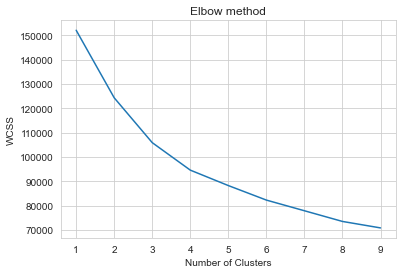

In [85]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Creemos que el número óptimo de cluster para este caso es de 4. Para asegurarnos lo que haremos será realizar un distortion visualizer, con el objetivo de corroborar si la cantidad de clusters electa, es la correcta.

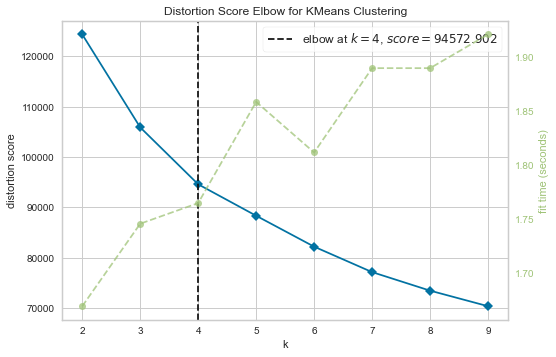

In [86]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(df)       
distortion_visualizer.show() 
display()

El "KElbowVisualizer" implementa el método de "codo" para ayudar a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores. 
En el punto en el que la gráfica se "quiebra" en un codo (el punto de inflexión en la curva) es una buena indicación de que el modelo subyacente se ajusta mejor a ese punto. 

El "distortion score"  es el calculo de la suma de las distancias al cuadrado desde cada punto al centroide. 

La "Silhouette distance" es otra métrica que calcula las distancias entre clusters y esta varía entre 1 y -1. Si es 1, significa que  los clusters están bien definidos y si es -1, no lo es.

In [87]:
df2 = df.copy()

In [88]:
ykmeans =  KMeans(n_clusters = 4).fit_predict(df2)

df2['cluster'] = pd.DataFrame(ykmeans)

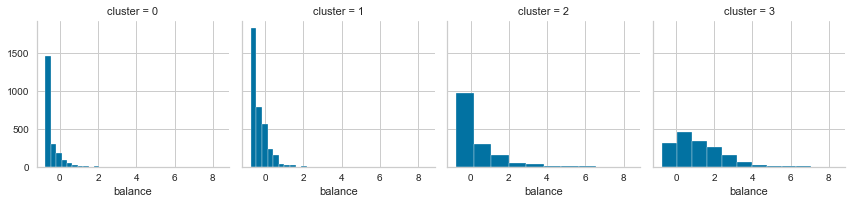

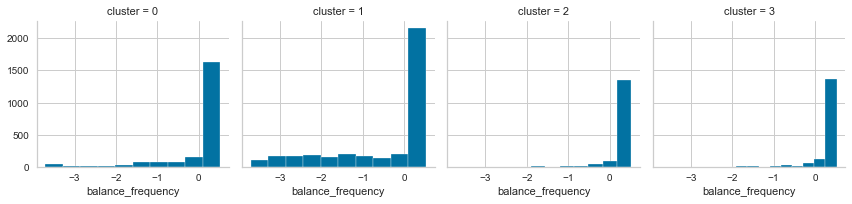

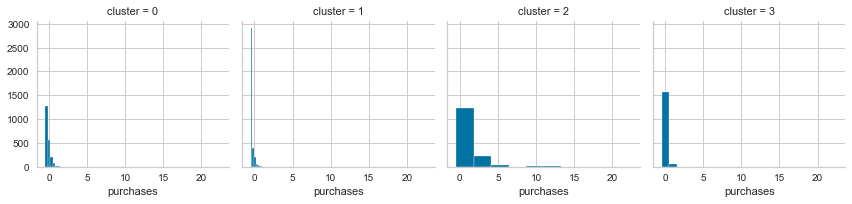

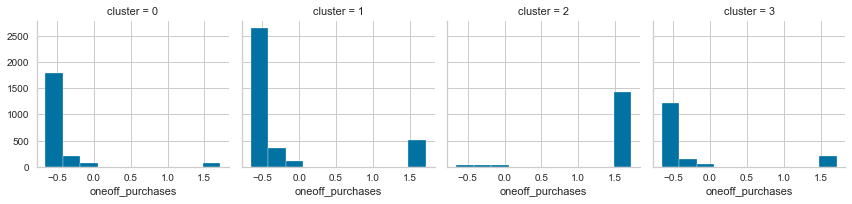

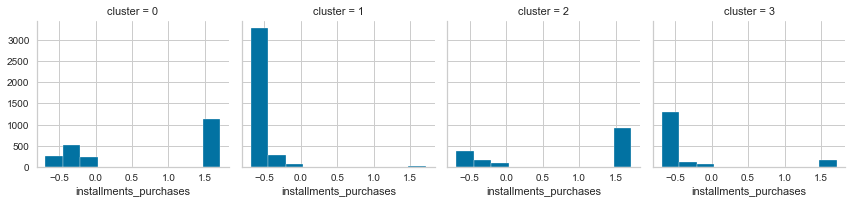

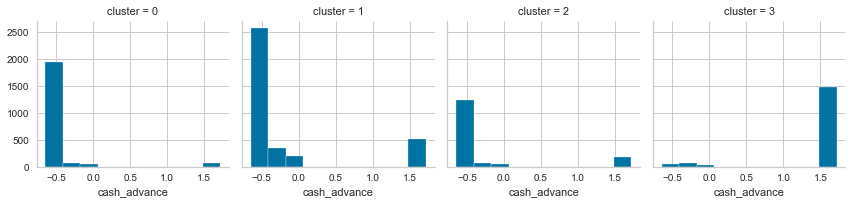

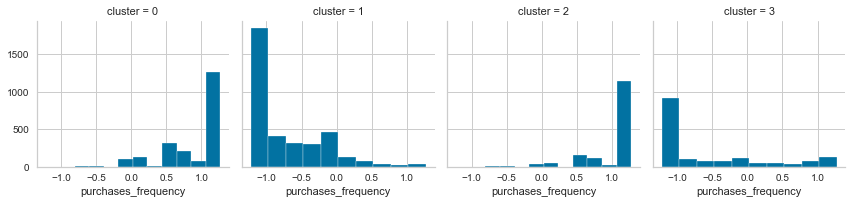

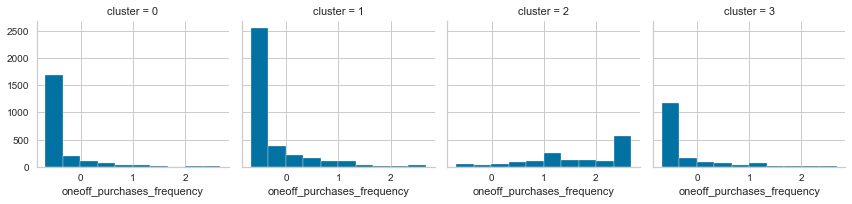

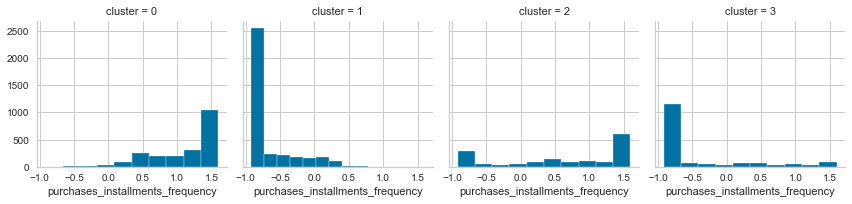

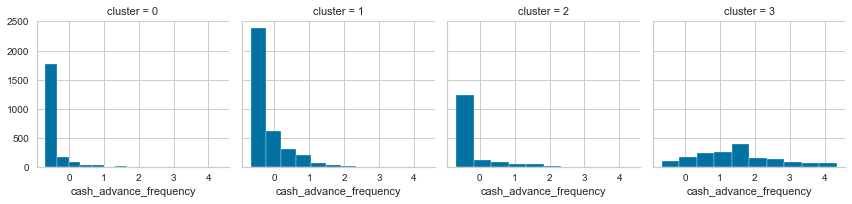

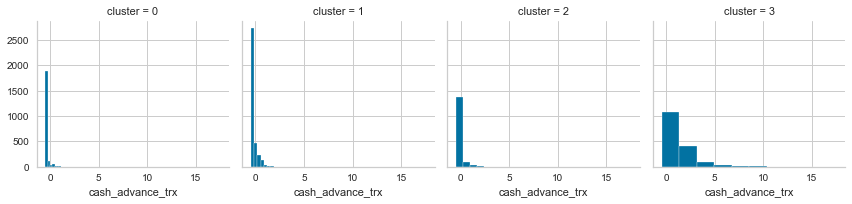

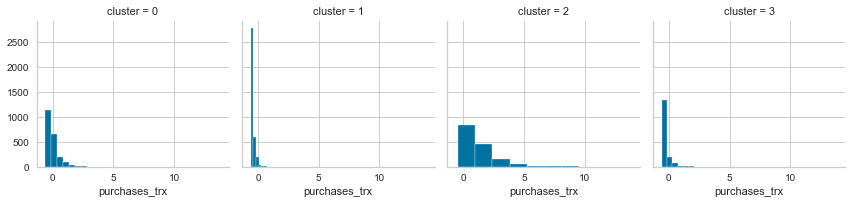

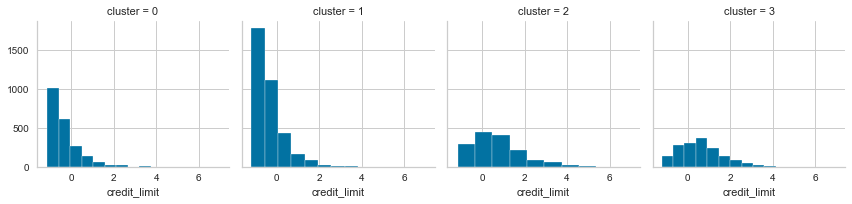

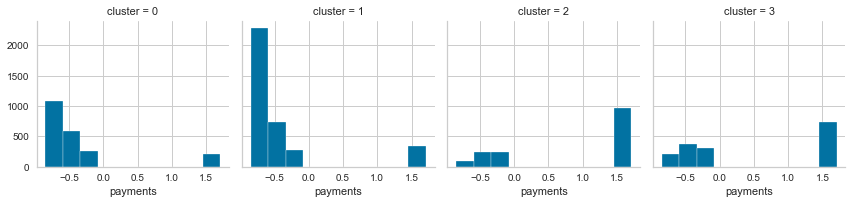

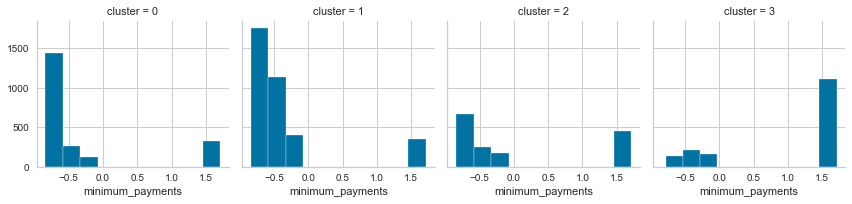

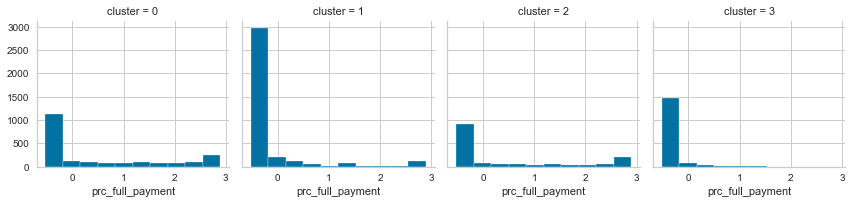

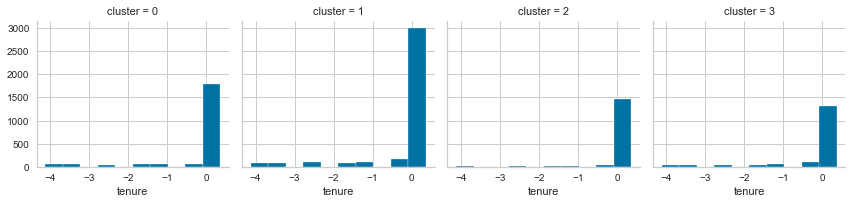

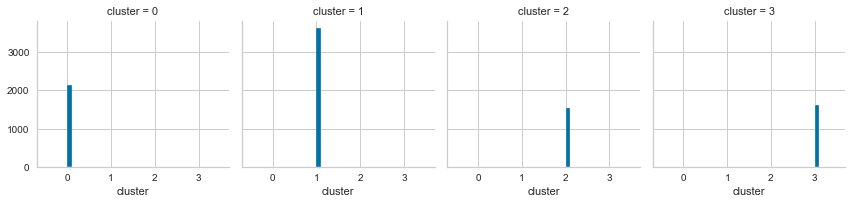

In [89]:
for c in df2:
    grid= sns.FacetGrid(df2, col='cluster')
    grid.map(plt.hist, c)

## PCA

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
principalComponents = pca.fit_transform(X = df2)
df2_pca = pd.DataFrame(principalComponents)
df2_pca.columns = ['P1', 'P2'] 

df2_pca.head()

P1        P2
0 -1.159222 -2.057580
1 -2.325868  2.463464
2  1.367644  0.812338
3 -0.581260 -0.581195
4 -1.244469 -1.639190

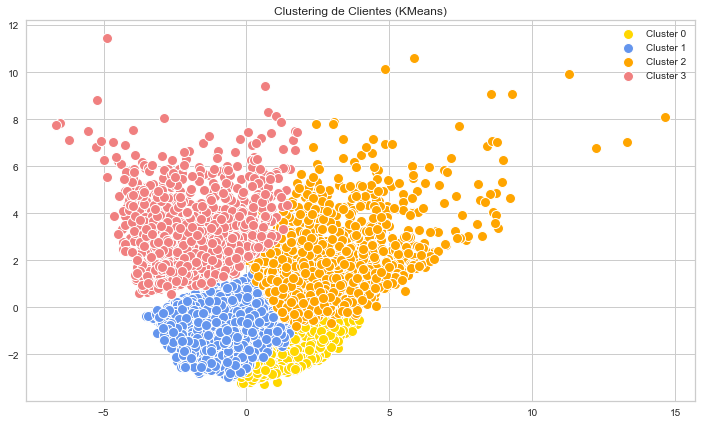

In [91]:
x = df2_pca.iloc[:, [0,1]].values

plt.figure(figsize=(12,7))
plt.scatter(x[ykmeans==0, 0], x[ykmeans==0, 1], s=100, c='gold', label ='Cluster 0',linewidths = 1, edgecolor ="white")
plt.scatter(x[ykmeans==1, 0], x[ykmeans==1, 1], s=100, c='cornflowerblue', label ='Cluster 1',linewidths = 1, edgecolor ="white")
plt.scatter(x[ykmeans==2, 0], x[ykmeans==2, 1], s=100, c='orange', label ='Cluster 2',linewidths = 1, edgecolor ="white")
plt.scatter(x[ykmeans==3, 0], x[ykmeans==3, 1], s=100, c='lightcoral', label ='Cluster 3',linewidths = 1, edgecolor ="white")
plt.title('Clustering de Clientes (KMeans)')
plt.legend(loc='best')
display()

## <font color='steelblue'>Interpretación de Clusters

- **Cluster 0:** Son los clientes con mejor balance en sus cuentas, pero a su vez son los que menos usan la tarjeta para realizar compras, aunque si retiran mucho efectivo. A ellos les podríamos ofrecer la Tarjeta Platinum, que si bien no tienen un uso intensivo, esta tarjeta los puede llegar a incentivar a usarla.

- **Cluster 1:** Los clientes que le dan un mayor uso a la tarjeta, por más que su poder adquisitivo sea de los más bajos. Son propensos a endeudarse, y compran mucho en cuotas. No les ofreceríamos tarjeta alguna porque no son el perfil de cliente que el banco busca para las dos tarjetas.
    
- **Cluster 2:** Clientes que realizan pagos en pocas cuotas, pero son los más cumplidores a la hora de pagar las deudas. La Tarjeta Global es la que consideramos ideal para ellos.
    
- **Cluster 3:** Los clientes que hace más tiempo están en el banco, por lo que su límite crediticio es de los más altos, esto los convierte en los que más gastan. La Tarjeta Platinum es la indicada.

A modo de extra decidimos graficar esta clusterización del modelo de KMeans, realiando el PCA correspondiente, pero utilizando lo que se llama cosine similarity. Ésta es una medida de similitud entre dos vectores distintos de cero de un espacio de producto interior que mide el coseno del ángulo entre ellos.
**Similarity = (A.B) / (||A||.||B||) donde A y B son vectores.**

Al calcular de manera distinta la distancia entre los puntos, el algoritmo de PCA va a reducir el dataset con otro criterio, pero manteniendo los 2 componentes que deseamos para graficar. Lo diferente se va a poder apreciar en la gráfica generada a continuación.

In [92]:
dfcos = df.copy()

In [93]:
kmean= KMeans(4)
kmean.fit(dfcos)
labels=kmean.labels_

In [94]:
clusters = pd.concat([dfcos, pd.DataFrame({'cluster':labels})], axis=1)

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dfcos)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

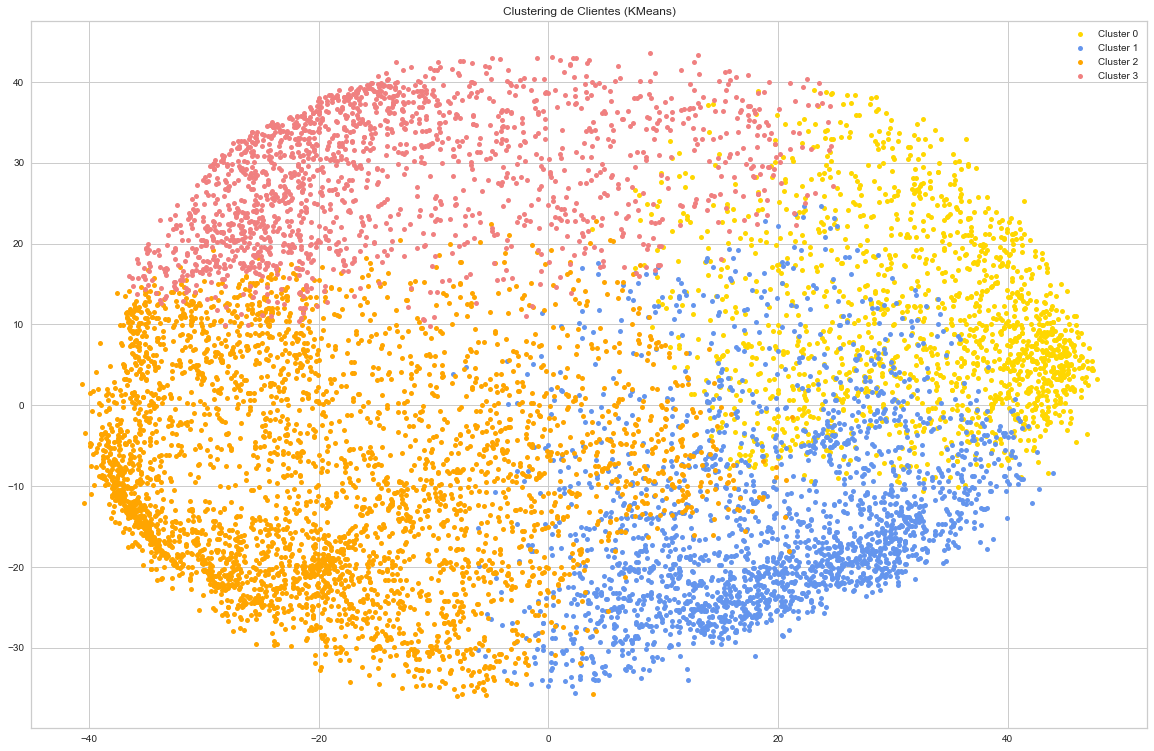

In [96]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'gold',
          1: 'cornflowerblue',
          2: 'orange', 
          3: 'lightcoral'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title('Clustering de Clientes (KMeans)')
display()

# <font color='steelblue'> 4. DBSCAN:  <a id='stop'></a>

El concepto principal del algoritmo DBSCAN (Density Based Spatial Clustering Algorithm with Noise) es localizar regiones de alta densidad que están separadas entre sí por regiones de baja densidad.

¿Cómo medimos la densidad y qué es una región densa?
- **Densidad en un punto P:** número de puntos en un círculo de radio épsilon 𝜀 desde un punto P.
- **Región densa:** para cada punto en un cluster, el círculo de radio 𝜀 contiene al menos el mínimo número de puntos (MinPts).

**Definiciones a tener en cuenta:**
- **Vecindad épsilon:** La vecindad épsilon de un punto P es el grupo de puntos que caen en un círculo de radio 𝜀 siendo P el centro de dicho círculo.
- **Core points:** puntos que satisfacen. Los core points son puntos que si dibujamos un círculo de radio 𝜀, con el core point como su centro, tendrán dentro de este círculo la cantidad mínima de puntos requeridos o más.
- **Border point:** son puntos que si trazamos un círculo de radio épsilon, tomando el punto como centro, no contienen el mínimo número de puntos requeridos.
- **Ruido:** puntos que no son core ni border.

**Directamente alcanzable por densidad:** un punto A es directamente alcanzable por densidad (directly density reachable) por un punto B si:
1. B es un core point
2. A pertenece a la vecindad épsilon de B

**Alcanzable por densidad:** un punto A es alcanzable por densidad (density reachable) por un punto B con respecto a un 𝜀 y un número mínimo de puntos si:
1. “Para una cadena de puntos P1, P2, …, Pn donde P1 = A y Pn = B, los puntos Pi+1 son directamente alcanzables por densidad de los puntos Pi .”

**Densamente conectados:** un punto A esta densamente conectado con un punto B, con respecto a 𝜀 y MinPts., si existe un punto C tal que A y B son alcanzables por densidad por C.

**Pasos del algoritmo DBSCAN:**
1. El algoritmo comienza con un punto arbitrario que no ha sido visitado y su información de vecindad es obtenida a partir de épsilon.
2. Si este punto contiene MinPts. en su vecindad épsilon se forma un cluster. De lo contrario, es catalogado como ruido. Este punto puede ser más tarde encontrado en la vecindad épsilon de otro punto y por ende pertenecer a otro cluster.
3. Si se determina que un punto es core entonces los puntos de su vecindad épsilon son parte de su cluster. Entonces, todos los puntos de encontrados en la vecindad épsilon son añadidos al igual que toda su vecindad si son puntos core.
4. El proceso anterior se repite hasta que todo el cluster densamente conectado es hallado.
5. El proceso se reinicia con un nuevo punto que puede ser parte de un nuevo cluster o ruido.

#### <ins>Ventajas</ins>

- No requiere mucho conocimiento del campo.
- Puede descubrir clusters de formas arbitrarias.
- Eficiente para grandes volúmenes de datos.
-  Pocos hiperparámetros que tunnear (radio épsilon y mínimo número de puntos).
- Maneja eficientemente la presencia de outliers y ruido. Se ve poco afectado por éstos.

#### <ins>Desventajas</ins>

- Si el conjunto de datos presenta clusters de densidad variable entonces DBSCAN falla en agrupar correctamente los datos ya que el algoritmo depende de épsilon y MinPts. No pueden ser elegidos de manera separada para cada cluster.
- Si los datos y los atributos no son bien entendidos por un experto en el campo, entonces establecer épsilon y MinPts. puede ser díficil. Puede requerir múltiples iteraciones con distintos valores de estos hiperparámetros.

Importamos la libreria de DBSCAN proveniente de sklearn

In [97]:
from sklearn.cluster import DBSCAN

Ahora proseguimos a determinar los parametros que anteriormente explicamos que se deben determinar en este algoritmo:

    1. Epsilon (eps): La distancia maxima que puede haber entre los puntos agrupados en un cluster y su centroide.
    2. min_samples: La cantidad minima de puntos que debe contener cada cluster.

In [98]:
df3 = df.copy()

In [99]:
dbscan = DBSCAN(eps=0.58, min_samples = 15, metric ='manhattan')

In [100]:
dbscan.fit(df3)

DBSCAN(eps=0.58, metric='manhattan', min_samples=15)

Corremos y se entrena el algoritmo

In [101]:
clusters = dbscan.fit_predict(df3)

In [102]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

Hacemos una breve visulizacion de algunos scores para poder ver que tan bueno es nuestro modelo.

## Método average silhouette


El método de average silhouette considera como número óptimo de clusters aquel que maximiza la media del silhouette coeficient de todas las observaciones.

El silhouette coeficient  (si)  cuantifica cómo de buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.

In [103]:
silhouette_score(df3, clusters)

0.02013195121915209

In [104]:
calinski_harabasz_score(df3, clusters)

124.0084311535945

In [105]:
df3['cluster'] = pd.DataFrame(clusters)

Visualizamos el numero de clusters que creo nuestro modelo, como podemos ver son 7 clusters

In [106]:
df3['cluster'].value_counts()

-1    8792
 0     132
 1      26
Name: cluster, dtype: int64

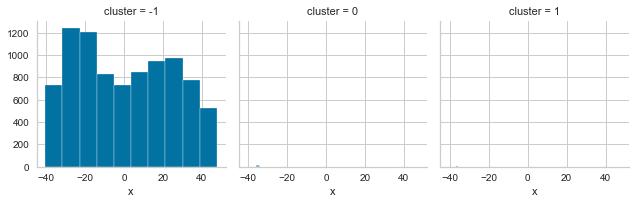

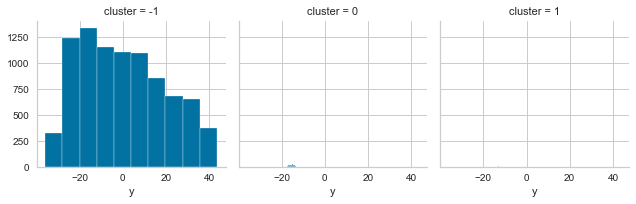

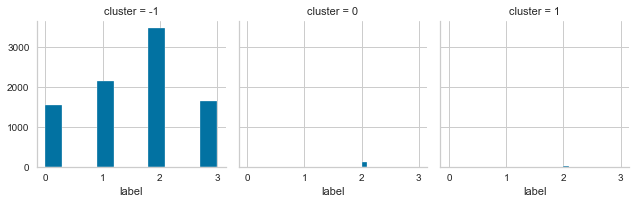

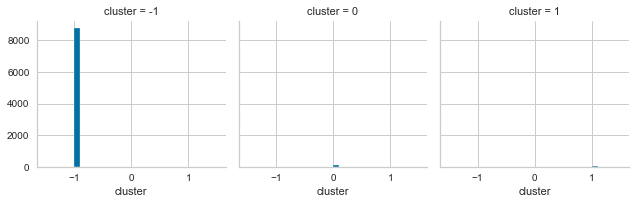

In [107]:
for c in df3:
    grid= sns.FacetGrid(df3, col='cluster')
    grid.map(plt.hist, c)

## PCA

In [108]:
pca = PCA(n_components = 2) 
principalComponents = pca.fit_transform(X = df3)
df3_pca = pd.DataFrame(principalComponents)
df3_pca.columns = ['P1', 'P2'] 

df3_pca.head()

P1         P2
0 -27.431054 -27.944694
1 -19.277279  32.058726
2  18.144393   5.887009
3 -12.153353  -2.566049
4 -29.572075 -20.755386

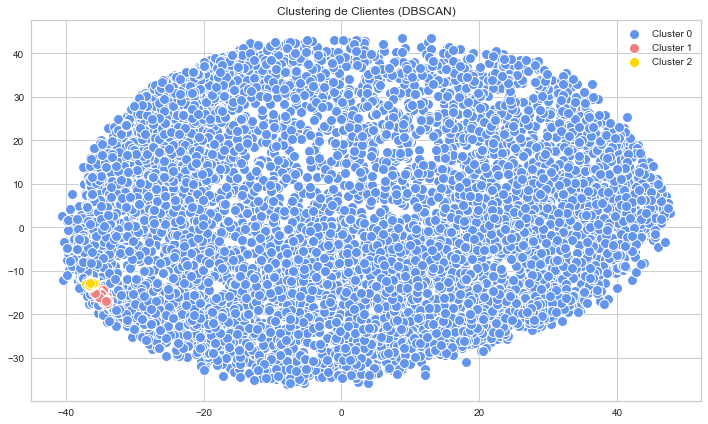

In [109]:
x = df3_pca.iloc[:, [0,1]].values

plt.figure(figsize=(12,7))
plt.scatter(x[clusters==-1, 0], x[clusters==-1, 1], s=100, c='cornflowerblue', label ='Cluster 0',linewidths = 1, edgecolor ="white")
plt.scatter(x[clusters==0, 0], x[clusters==0, 1], s=100, c='lightcoral', label ='Cluster 1',linewidths = 1, edgecolor ="white")
plt.scatter(x[clusters==1, 0], x[clusters==1, 1], s=100, c='gold', label ='Cluster 2',linewidths = 1, edgecolor ="white")
plt.title('Clustering de Clientes (DBSCAN)')
plt.legend(loc='best')
plt.show()

# <font color='steelblue'> 5. Método de Ward:  <a id='a'></a>

El metodo de Ward, tambien conocido como el método de varianza mínima, es un método de clusterizacion presentado por Joe H. Ward, Jr. Él propuso que la pérdida de información que se produce al integrar los distintos individuos en clusters, puede medirse a través de la suma total de las varianzas entre cada punto (individuo) y la media del cluster en el que se integra.

En base a esto, propone minimizar la suma sobre todos los clusters de la varianza dentro de cada cluster. Básicamente Ward lo que busca es clusterizar datos de manera de perder la menor cantidad de información posible por medio del calculo de la menor varianza dentro de los clusters. 

Este algoritmo en términos de funcionamiento y pasos es muy parecido por no decir igual que los algoritmos jerárquicos algomerativos. Esto quiere decir que si tenemos una base de datos con n datos, el algoritmo de Ward va a comenzar teniendo n clusters (1 cluster por dato) y partiendo de esa base va a ir uniendo los clusters creando nuevos clusters con mayor cantidad de datos, reduciendo el número de clusters. Pero en este caso la manera de determinar la union entre clusters ya no se trata de distancias sino de varianza.
En cada paso de este algoritmo se debe encontrar el par de clusters que generan el mínimo incremento posible de la varianza total dentro de los clusters después de mezclarlos


In [110]:
df4 = df.copy()

In [111]:
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

## Dendrograma

Un dendograma es un diagrama que representa un árbol. Esta representación esquemática se utiliza con frecuencia en diferentes contextos: en el agrupamiento jerárquico, ilustra la disposición de los agrupamientos producidos por los análisis correspondientes.

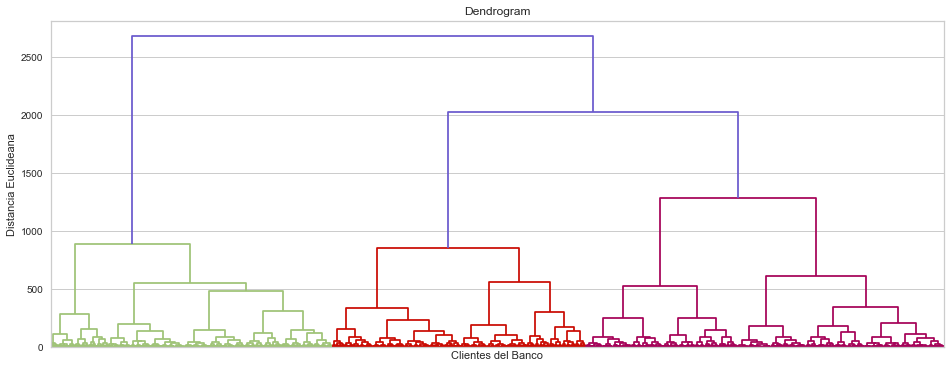

In [112]:
plt.figure(1, figsize = (16 ,6))
dendrogram = sch.dendrogram(sch.linkage(df4, method  = "ward"), no_labels = True, above_threshold_color='slateblue')

plt.title('Dendrogram')
plt.xlabel('Clientes del Banco')
plt.ylabel('Distancia Euclideana')
display()

In [113]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

y_hc = hc.fit_predict(df4)

df4['cluster'] = pd.DataFrame(y_hc)

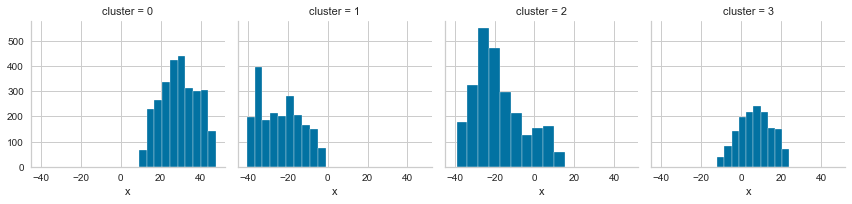

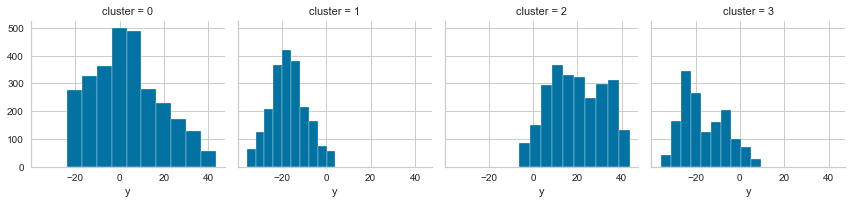

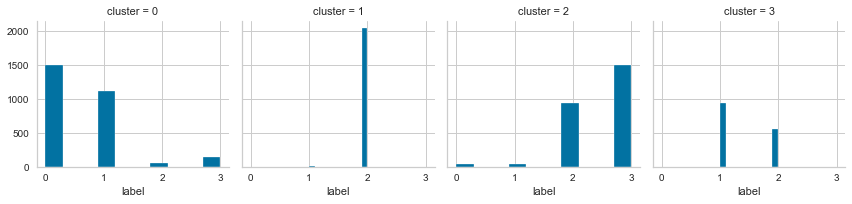

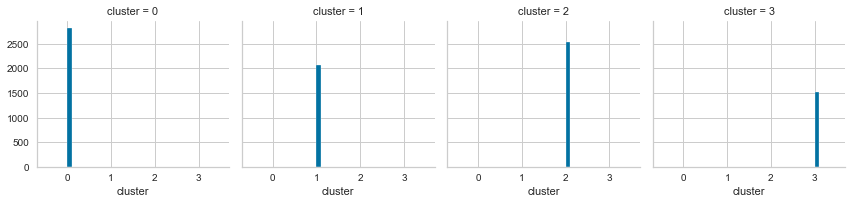

In [114]:
for c in df4:
    grid= sns.FacetGrid(df4, col='cluster')
    grid.map(plt.hist, c)

## PCA

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
principalComponents = pca.fit_transform(X = df4)
df4_pca = pd.DataFrame(principalComponents)
df4_pca.columns = ['P1', 'P2'] 

df4_pca.head()

P1         P2
0 -27.422172 -27.939995
1 -19.284493  32.059367
2  18.167050   5.888034
3 -12.164889  -2.566273
4 -29.562167 -20.750416

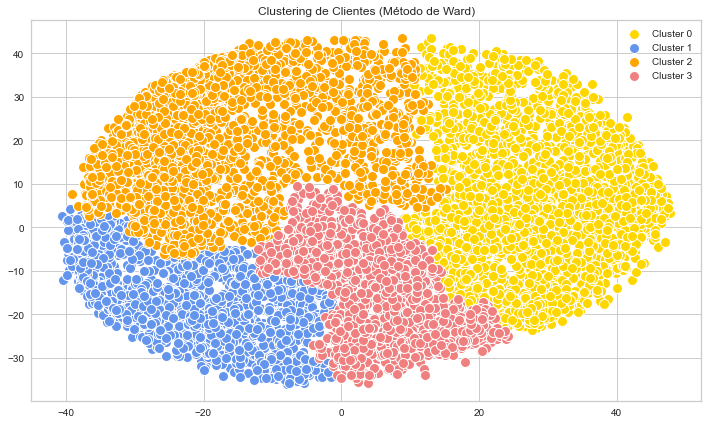

In [116]:
x = df4_pca.iloc[:, [0,1]].values

plt.figure(figsize=(12,7))
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, c='gold', label ='Cluster 0',linewidths = 1, edgecolor ="white")
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100,  c='cornflowerblue', label ='Cluster 1',linewidths = 1, edgecolor ="white")
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100,  c='orange', label ='Cluster 2',linewidths = 1, edgecolor ="white")
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, c='lightcoral', label ='Cluster 3',linewidths = 1, edgecolor ="white")
plt.title('Clustering de Clientes (Método de Ward)')
plt.legend(loc='best')
plt.show()

In [117]:
trace1 = go.Scatter3d(
    x= df4_pca['P1'],
    y= df4_pca['P2'],
    z= df4['cluster'],
    mode='markers',
     marker=dict(
        color = df4['cluster'], 
        size= 10,
        line=dict(
            color= df4['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clustering de Clientes 3d (Método de Ward)',
    scene = dict(
            xaxis = dict(title  = 'P1'),
            yaxis = dict(title  = 'P2'),
            zaxis = dict(title  = 'Cluster')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## <font color='steelblue'>Interpretación de Clusters

Ahora vamos a analizar cada cluster creado por nuestro modelo para poder ver y bajar mas a tierra a nuestro caso en especifico que cluster contiene a los clientes que tal vez podamos ofrecerles alguna de las dos tarjetas y cuales son los clusters que contienen a los clientes que no son posibles usuarios portadores de las nuevas tarjetas.

En el siguiente codigo visualizamos cuantas "filas" (usuarios) tenemos en cada uno de los clusters y se encuentran ordenados por orden descendente, el primer cluster es el que contiene mayor cantidad de usuarios y asi sucesivamente.

In [118]:
df4['cluster'].value_counts()

0    2824
2    2541
1    2073
3    1512
Name: cluster, dtype: int64

In [119]:
df4_cluster_0 = df4.loc[df4.loc[:, 'cluster'] == 0]

In [120]:
df4_cluster_0.describe()

x            y        label  cluster
count  2824.000000  2824.000000  2824.000000   2824.0
mean     29.305367     3.471162     0.589943      0.0
std       9.065774    15.269583     0.764320      0.0
min       9.061685   -23.612413     0.000000      0.0
25%      22.614978    -7.780010     0.000000      0.0
50%      29.140349     2.354276     0.000000      0.0
75%      36.574805    13.092835     1.000000      0.0
max      47.736637    43.340783     3.000000      0.0

In [121]:
df4_cluster_1 = df4.loc[df4.loc[:, 'cluster'] == 1]

In [122]:
df4_cluster_1.describe()

x            y        label  cluster
count  2073.000000  2073.000000  2073.000000   2073.0
mean    -23.581160   -17.006229     1.991799      1.0
std      10.419058     7.997931     0.090207      0.0
min     -40.595632   -35.936935     1.000000      1.0
25%     -33.912154   -22.164645     2.000000      1.0
50%     -23.879217   -17.288101     2.000000      1.0
75%     -15.298823   -12.036017     2.000000      1.0
max      -1.058738     4.100283     2.000000      1.0

In [123]:
df4_cluster_2 = df4.loc[df4.loc[:, 'cluster'] == 2]

In [124]:
df4_cluster_2.describe()

x            y        label  cluster
count  2541.000000  2541.000000  2541.000000   2541.0
mean    -17.562711    19.740541     2.543880      2.0
std      12.558339    12.134573     0.614252      0.0
min     -39.075413    -6.389197     0.000000      2.0
25%     -26.634973    10.261503     2.000000      2.0
50%     -20.830255    19.338530     3.000000      2.0
75%     -10.258140    30.507615     3.000000      2.0
max      15.236304    43.551908     3.000000      2.0

In [125]:
df4_cluster_3 = df4.loc[df4.loc[:, 'cluster'] == 3]

In [126]:
df4_cluster_3.describe()

x            y        label  cluster
count  1512.000000  1512.000000  1512.000000   1512.0
mean      7.111267   -16.342171     1.374339      3.0
std       8.165322    10.021398     0.484112      0.0
min     -12.022862   -35.768958     1.000000      3.0
25%       0.856834   -24.458591     1.000000      3.0
50%       7.178272   -18.932648     1.000000      3.0
75%      13.210994    -8.173606     2.000000      3.0
max      24.145657     9.431366     2.000000      3.0

En los codigos anteriores lo unico que hicimos fue separar cada cluster de datos y hacer un simple describe de los datos para poder ver un poco de estadisticas sobre los mismos para asi poder ir generando un analisis mejor fundamentado y mas solido. Si bien no estamos encargados especificamente de esta tarea, nos gustaria hacer un breve analisis de cada cluster de clientes que se formo a partir del metodo de Ward.

Comenzaremos por describir y recomendar a que cluster de clientes le ofreceriamos la tarjeta Platinium si tuvieramos que tomar la decision nosotros. Sin duda apuntaria como principal candidato al cluster numero 2. Como podemos ver tiene muchas caracteristicas que se encuentran con un alto nivel en comparacion al resto de clusters y que ademas resaltan el tipo de caracteristicas de cliente que se busca para ofrecer este nuevo producto del banco.

Comenzando por el BALANCE que tal vez sea uno de los grandes indicadores de riqueza que tenemos, en este cluster en promedio tienen el nivel mas alto de balance y si bien su maximo no alcanza el nivel mas alto (lo tiene el cluster numero 1), tiene un nivel muy alto. Si bien no son clientes que compren mucho por lo que nos revelan las estadisticas del cluster en el campo de PURCHASES, podemos ver que hay caracteristicas que nos continuan remarcando como el nivel adquisitivo de estos clientes es alto. Esto lo podemos ver en el campo INSTALLMENTS PURCHASES ya que es bajo el promedio lo cual indica que en general no pagan mucho en cuotas lo cual podria ser un indicador de un buen nivel adquisitivo ya que cuentan con el dinero para pagar las cosas en el momento de la compra y no en cuotas. Generalizando, todo campo que refiere a pagos en cuotas tiene un bajo nivel mientras que otros campos como el retiro de dinero y el limite de creditos son altos en general lo cual resalta nuevamente el nivel adquisitivo de este grupo de clientes del banco.

Pasando luego a lo que seria el producto de la Tarjeta Global para las compras online de hasta 12 cuotas sin recargo entraria principalmente el cluster numero 1. En lo que respecta al nivel del balance total de las cuentas de estos clientes podemos ver que es positivo y es superior a todos menos al cluster 2, por lo que tenemos clientes los cuales basandonos solo en esta caracteristica podemos decir que tiene un nivel adquisitivo intermedio. Ahora bien, en el caso de esta tarjeta nos interesa un tipo de cliente el cual sea activo con las compras y que justamente utilice el pago en cuotas como alternativa de pago en general y estas son las caracteristicas en las que se destaca notoriamente este grupo de clientes.

Primero podemos decir que el nivel promedio de compras de este grupo es el mas alto de todos y su nivel maximo es extremadamente alto en comparacion con los otros grupos, este ya es un gran indicador del tipo de cliente al que nos enfrentamos, ya que se demuestra activo en las compras. Luego, si nos fijamos en el campo de INSTALLMENTS PURCHASES nuevamente alcanza un nivel promedio mas alto que el resto de clusters y esto quiere decir que estos clientes presentan un gran uso del pago en cuotas a la hora de realizar sus compras. Solo mirando estos campos ya podemos destacar caracteristicas asociadas a las que buscamos para ofrecer este producto. Generalizando, este tipo de comportamiento se repite de manera parecida en lo que respecta a los otros campos del cluster.

Pasando a lo que serian el cluster numero 0 y numero 3 nos encontramos con dos grupos los cuales parecerian no tener las caracteristicas que encajan con el tipo de clientes que buscamos para alguno de los dos productos nuevos del banco. En el cluster numero 3 se puede destacar un claro comportamiento de uso de pago en cuotas a la hora de realizar compras lo cual seria un punto a favor para considerar este grupo de clientes en el producto de la tarjeta Global, este tipo de caracteristicas se repiten en campos del tipo similar.

En el caso del cluster numero 0 encontramos un grupo que si bien pareceria no encajar en el perfil de ninguno de los tipos de clientes que buscamos para ofrecer nuestros nuevos productos, no deja de ser un grupo importante e interesante de investigar. Ya que a raiz de los datos que obtenemos de este cluster podriamos encontrar y crear productos y/o servicios los cuales se adapten a las caracteristicas y necesidades de ese tipo de clientes. Por ejemplo se puede resaltar una tendencia a retirar mayores cantidades de dinero que otros grupos y en una frecuencia mayor y por lo que vimos en el codigo de "value_counts" es el cluster con mayor cantidad de clientes, es por esta razon que podriamos por ejemplo crear ciertas facilidades para retirar dinero y algun beneficio de cambio de moneda ya que vemos que utilizan mucho el efectivo. Es muy importante prestar atencion a este grupo ya que es el mas grande en terminos de cantidad de personas.

- Los puntos azules refieren al cluster 0.
- Los puntos violetas refieren al cluster 1.
- Los puntos naranjas refieren al cluser 2.
- Los puntos amarillos refieren al cluester 3.

# <font color='steelblue'> 6. Listado de Preguntas y Modelo Predictivo:  <a id='b'></a>

Para ayudar al banco en su tarea de armar un cuestionario para nuevos clientes, de forma de poder ofrecer el producto a usuarios de los cuales no cuenta con histórico transaccional decidimos crear un dataset de cero, totalmente random, con el objetivo de que éste, de cierta forma termine ayudando a generar un modelo de predicción de la propensión de los clientes a aceptar o no la tarjeta premium del banco en caso de que ésta sea ofrecida.

Cabe aclarar que los datos generados son totalmente al azar. Fue utilizado el programa Excel en su creación. Se intentó que las proporciones de las variables en cada columna no sean iguales, con el objetivo de que el análisis sea lo más acertado que se pueda. Pudimos generar 300 respuestas al cuestionario creado

Las preguntas que terminamos creando para el cuestionario para detectar nuevos clientes son las siguientes:

- **¿Cuál es su edad?** - Esta pregunta nos permitiría saber si hay alguna diferencia en la idea de aceptar la tarjeta premium de acuerdo a si una persona es joven o si es mayor. Queremos destacar que el cuestionario se hizo apuntando a un público mayor a los 21 años, ya que consideramos que a partir de esa edad es más común que las personas comiencen a utilizar tarjetas de crédito.


- **¿Con qué género te identificas?** - Con esta pregunta apuntamos a ver si existen diferencias en los criterios de acuerdo al género de las personas. Un valor de 1 refiere a los hombres y 0 a las mujeres.


- **¿Vives en Montevideo, o en el interior del país?** - Al preguntar esto, nosotros lo que queremos saber es si hay alguna tendencia respecto al uso de las tarjetas de acuerdo a la ubicación geográfica del encuestado. Decidimos al público en Montevideo y en Interior porque es más representativo que desglosar por los 19 departamentos de Uruguay. Un valor de 1 refiere a Montevideo y 0 al Interior.


- **¿Actualmente Trabaja?** - De antemano creemos que una persona propensa a aceptar a esta tarjeta premium está trabajando. Dentro de las personas que no trabajan, consideramos a los estudiantes, como también a los jubilados, que son un público que puede llegar a ser influyente para nuestro análisis. Un valor de 1 refiere a las personas que acutalmente trabajan y el 0 a los que no lo hacen.


- **¿Tiene Auto?** -  Una de las variables que pensamos que tal vez podrían ayudarnos a segmentar bien a la población es si tienen auto. Al preguntar esto podemos llegar a encontrar personas que tal vez, no siempre es el caso, tiendan a utilizar mucho más las tarjetas de las bancos. Un valor de 1 refiere a que sí poseen auto y 0 que no.


- **¿Cuántas tarjetas de crédito tiene**? - Con esta pregunta lo que queremos averiguar claramente es si la persona habitúa a usar tarjetas de crédito. Esta pregunta puede llegar a ser de las más influyentes a la hora del análisis y del modelo de predicción, ya que si una persona tiene más de 1 tarjeta, es probable que esté registrada en varios bancos, y tal vez tenga una mayor propensión a unirse al banco para el cual estamos realizando el proyecto. Para los valores establecimos un límite entre 0 y 3 tarjetas, ya que a este último número lo consideramos lo suficientemente representativo de posibles valores altos.


- **¿De cuántos integrantes se compone su núcleo familiar?** - Una persona que viva en una familia de muchos integrantes, posee una alta probabilidad de utilizar tarjetas de crédito en sus gastos diarios. Si el número de personas es alto también podemos suponer que los gastos son mayores a una persona que viva sola. Con esta pregunta queremos saber si estas personas de las que creemos que utilizan muy seguido su tarjeta son el público objetivo al que apuntamos.


- **¿Cuántos días a la semana usted pide comida a través de apliaciones y/o teléfono, o sale a comer fuera de casa?** - Esta pregunta es considerada importante, ya que nos puede indicar ciertos hábitos de la persona, de gastar más dinero en alimento, lo cuál es posible que nos lleve a encontrar a clientes propensos a aceptar la tarjeta premium del banco, que imaginando, le pueda llegar a brindar beneficios en el sector de la industria alimentaria.


- **¿Cuantos días a la semana usted realiza actividades de entretenimiento? (considérese ir a espectáculos musicales, deportivos, cine/teatro u otras actividades recreativas que vienen la caso** - Al igual que la pregunta anterior, lo que buscamos es encontrar ciertos hábitos en las personas con mayor propensión a aceptar el plan premium del banco. Vimos que las actividades de recreación son un muy buen indicador de gasto de las personas, por lo cual pensamos que una pregunta de este estilo no podía faltar.


- **Del 1 al 5, siendo 1 nada propenso a tomarme vacaciones en el año, y 5 siendo muy propenso a tomarme en el año, ¿en qué nivel te ubicarías?** - Como última pregunta relacionada a los hábitos de las personas creamos ésta, con la que buscamos detectar si existe cierta relación entre irse de vacaciones por lo menos una vez al año y la aceptación de una posible tarjeta premium del banco en caso de que sea ofrecida.


- **En caso de que a usted el banco le ofreciera una tarjeta premium con beneficios, ¿usted la aceptaría?** - Esta última pregunta realizada en el cuestionario es nuestra variable objetivo. Al final del cuestionario hacemos esta pregunta, para tener un indicador real del comportamiento y accionar de los clientes respecto al ofrecimiento de una nueva tarjet de crédito premium del banco, que mediante los datos generados por las anteriores preguntas, nos permite lograr el tan ansiado modelo de predicción.

El modelo predictivo será realizado de dos formas, de acuerdo a lo trabajado en clase. Lo realizaremos utilizado aprendizaje supervisado, y no supervisado. Para el primero crearemos un modelo de Regresión Logpistica, y para el segundo un modelo de KMeans.

In [127]:
cuest = pd.read_csv('Datos AA - Hoja 1.csv')

In [128]:
cuest.reset_index(drop=True, inplace=True)
cuest.head()

Edad  Género  Montevideo o Interior  Actualmente Trabaja  Tiene Auto  \
0    25       0                      1                    1           0   
1    57       1                      1                    1           1   
2    67       1                      1                    1           1   
3    71       1                      0                    1           1   
4    57       0                      1                    0           1   

   Cantidad Tarjetas Crédito  Integrantes Núcleo Familiar  \
0                          1                            2   
1                          3                            6   
2                          2                            3   
3                          3                            5   
4                          1                            1   

   Cantidad Días Sale a Comer  Cantidad Días Entretenimiento  \
0                           1                              1   
1                           4                              3   
2                           2                              2   
3                           5                              0   
4                           0                              0   

   Propensión a irse de vacaciones en el año  Aceptaría la Tarjeta  
0                                          2                     0  
1                                          4                     1  
2                                          3                     1  
3                                          5                     1  
4                                          1                     0

In [129]:
x = cuest.iloc[:, 0:10]
y = cuest.iloc[:, 10:11]

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix, classification_report

In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 3)

SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

In [132]:
modelo = LogisticRegression()
modelo.fit(x_train, y_train)
modelo_pred = modelo.predict(x_test)

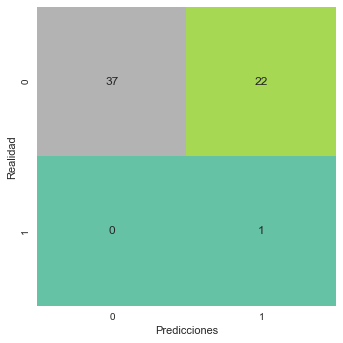

In [133]:
matriz = confusion_matrix(y_test, modelo_pred)
sns.heatmap(matriz.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [134]:
print(classification_report(y_test, modelo_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        37
           1       1.00      0.04      0.08        23

    accuracy                           0.63        60
   macro avg       0.81      0.52      0.43        60
weighted avg       0.77      0.63      0.51        60



In [135]:
modelo_pred_proba = modelo.predict_proba(x_test)

In [136]:
print(roc_auc_score(y_test, modelo_pred))

0.5217391304347826


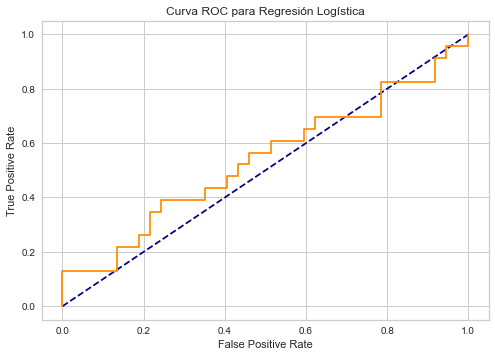

In [137]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Regresión Logística')
display()

Vemos que el modelo de predicción creado no es del todo bueno. No significa que esté mal realizado, todo lo contrario. Al estar basado en datos generados al azar, la predicción no tiene mucho de realidad. Es sumamente probable que no exista correlación alguna entre los datos, ni probablemente haya linealidad en los mismos, es decir, pueden haber muchos casos donde personas responden la encuesta de maneras totalmente opuestas, pero terminan aceptando la oferta del banco. Seguramente, si el modelo hubiera sido realizado con datos reales su funcionamiento sería óptimo, pero al estar trabajando con información generada al azar, ésto es lo mejor que podemos ofrecer.

In [138]:
cuestk = cuest.drop(['Aceptaría la Tarjeta'], axis=1)

In [139]:
ykmeans =  KMeans(n_clusters = 2).fit_predict(cuestk)
cuestk['cluster'] = pd.DataFrame(ykmeans)

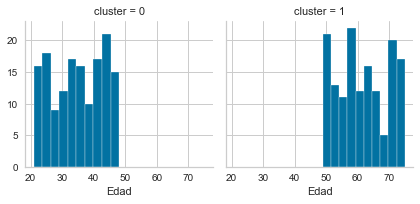

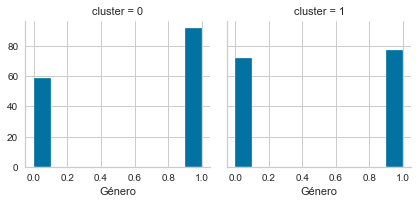

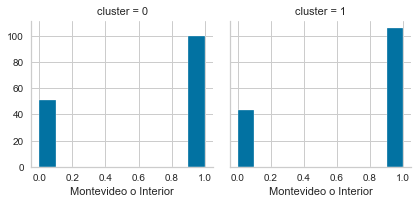

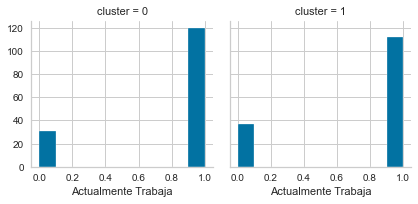

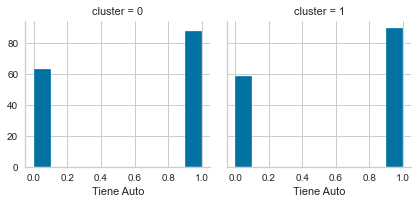

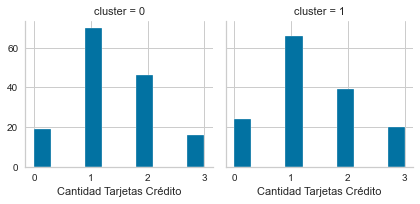

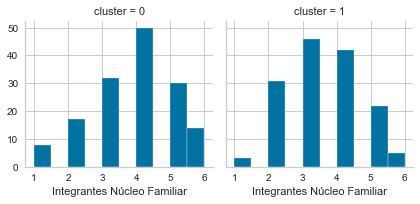

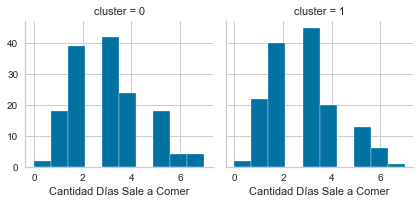

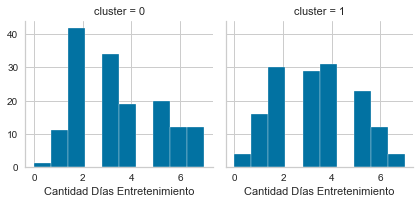

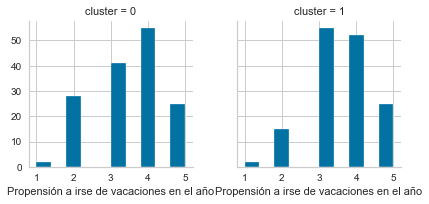

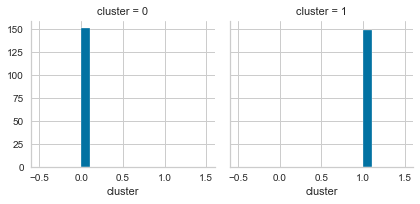

In [140]:
for c in cuestk:
    grid= sns.FacetGrid(cuestk, col='cluster')
    grid.map(plt.hist, c)

In [141]:
pca = PCA(n_components = 2) 
principalComponents = pca.fit_transform(X = cuestk)
cuestk = pd.DataFrame(principalComponents)
cuestk.columns = ['P1', 'P2'] 

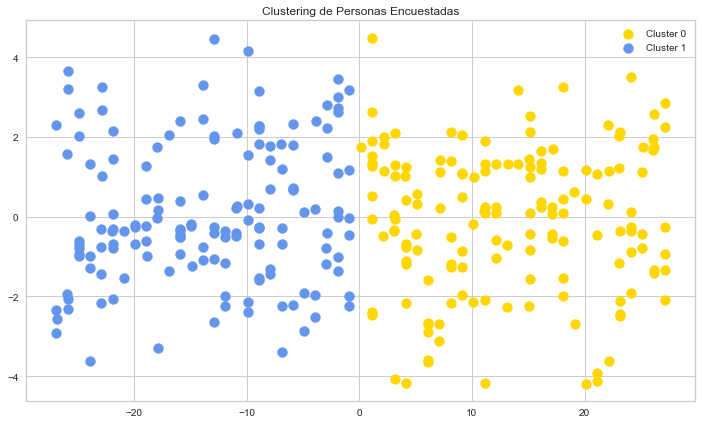

In [142]:
x = cuestk.iloc[:, [0,1]].values

plt.figure(figsize=(12,7))
plt.scatter(x[ykmeans==0, 0], x[ykmeans==0, 1], s=100, c='gold', label ='Cluster 0')
plt.scatter(x[ykmeans==1, 0], x[ykmeans==1, 1], s=100, c='cornflowerblue', label ='Cluster 1')
plt.title('Clustering de Personas Encuestadas')
plt.legend(loc='best')
plt.show()

Nuevamente el problema de la linealidad en la información vuelve a aparecer, esta vez en la clusterización de clientes. Lo que se puede rescatar de esta clusterización en dos grupos de los datos, es que nos separa a la población en 2 grupos de acuerdo a la edad, poniendo el límite en 50 años. Lastimosamente, por culpa de la aleatoriedad de los datos, no podemos distinguir con exactitud a que respuesta sobre la propensión a aceptar la tarjeta de crédito premium, refiere cada clúster. Una vez más, creemos que con datos que sí reflejen la realidad, ambos modelos, el de aprendizaje supervisado y el de no supervisado, serían muy útiles para el banco.

El objetivo principal de esta etapa del trabajo era crear preguntas que fueran lo suficientemente buenas para poder llegar a un modelo predictivo que identifique quién aceptaría la tarjeta premium si le fuera ofrecida. Consideramos que esto sí fue logrado, aunque los resultados obtenidos no acompañaron al desarrollo de la actividad. De todas formas consideramos el proceso exitoso, y se va a poder amoldar a futuros análisis realizados por el banco.

# <font color='steelblue'> 7. Comentarios Finales:  <a id='lemmatisation'></a>

In [143]:
contactos = pd.read_csv('DatasetContactos.csv', sep = ';')
contactos.head()

CUST_ID            PHONE  CONTACTS
0  C10001  +1 314-407-7397         2
1  C10002  +1 203-790-2151         2
2  C10003  +1 225-959-8209         3
3  C10004  +1 315-394-6219         0
4  C10005  +1 207-523-0823         0

In [144]:
contactos2 = contactos.copy()

## <font color='steelblue'> Contactos de acuerdo a KMeans

In [145]:
df2 = pd.concat([df2, contactos], axis = 1)

### Clientes que reciben la Tarjeta Premium

In [146]:
filtro1 = df2[(df2['CONTACTS']<2) & (df2['cluster'] == 0)]
filtro2 = df2[(df2['CONTACTS']<2) & (df2['cluster'] == 3)]

In [147]:
print('Le ofrecemos la tarjeta Premium a:', len(filtro1) + len(filtro2) ,'clientes')

Le ofrecemos la tarjeta Premium a: 1932 clientes


### Clientes que reciben la Tarjeta Global

In [148]:
filtro3 = df2[(df2['CONTACTS']<2) & (df2['cluster'] == 2)]

In [149]:
print('Le ofrecemos la tarjeta Global a:', len(filtro3), 'clientes')

Le ofrecemos la tarjeta Global a: 787 clientes


## <font color='steelblue'> Contactos de acuerdo a Ward

In [150]:
df4 = pd.concat([df4, contactos2], axis = 1)

### Clientes que reciben la Tarjeta Premium

In [151]:
filtro4 = df4[(df4['CONTACTS']<2) & (df4['cluster'] == 2)]

In [152]:
print('Le ofrecemos la tarjeta Premium a:', len(filtro4),'clientes')

Le ofrecemos la tarjeta Premium a: 1303 clientes


### Clientes que reciben la Tarjeta Global

In [153]:
filtro5 = df4[(df4['CONTACTS']<2) & (df4['cluster'] == 1)]

In [154]:
print('Le ofrecemos la tarjeta Global a:', len(filtro5), 'clientes')

Le ofrecemos la tarjeta Global a: 1046 clientes


A modo de conclusión del extenso trabajo realizado en esta notebook, nos gustaría aclarar una serie de puntos al respecto. Comenzando con la metodología de trabajo, creemos que la misma ha sido sumamente satisfactoria. Hemos alcanzado los objetivos propuestos, logrando la segmentación adecuada de los clientes del banco de acuerdo a los distintos modelos de aprendizaje no supervisado, como lo fueron el KMeans, DBSCAN y Ward, obteniendo en cada uno de ellos resultados totalmente distintos pero interesantes. Estos tres modelos arrojaron resultados que para el banco pueden ser bastante útiles, en donde se pudo detectar a un cierto número de clientes a los que sería recomendable ofrecerles la tarjeta Premium y la Global.

Hablando de diferencias entre los modelos, vemos que en el de KMeans se le ofrecería la tarjeta Premium a un total de 2673 clientes, más del doble que lo pensado para el de Ward (1146). Este número va de acuerdo a la interpretación nuestra sobre la composición de los clusters, y el resultado de los mismos. La diferencia en este caso es más grande de lo que se podía pensar, ya que para KMeans con tarjeta premium seleccionamos dos clusters mientras que con Ward solo uno.

Sobre la tarjeta Global la diferencia esta vez va a favor de los clusters de Ward con 1230 clientes contra 787 de KMeans. Esto se refleja más que nada en la interpretación de cada uno de los cuatro clusters creados ya que para cada uno de ellos se seleccionaron a los clientes de un solo cluster.

Ya sobre el final del trabajo, realizamos un modelo predictivo basado en una serie de preguntas, que ya fueron bastante explicadas y justificadas en profundidad. Solo podemos añadir nuevamente nuestra satisfacción sobre lo hecho. Dejamos una base de un modelo con una idea de como realizarlo, que para el banco podría ser utilizada con éxito una vez que se implemente con datos reales.

Para terminar nos gustaría hablar brevemente de nuestro contento con la actividad realizada. Ésta nos permitió adentranos en el mundo del aprendizaje automático no supervisado con resultados positivos. Trabajamos con tres modelos totalmente distintos que arrojaron diferentes conclusiones, lo cual es bueno, ya abre la puerta a un análisis detallista y riguroso. Fue una actividad muy buena y desafiante, que nos permitió a nosotros como grupo trabajar e investigar constantemente, para así poder mostrar un trabajo que sea de calidad.